<a href="https://colab.research.google.com/github/hopesowle/BiologicallyIntelligentExploration/blob/main/Sowle_Homework2_signals_and_decisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 2: Signals and decisions**

## Getting started

This homework will involve concepts from the labs we've gone over in class. Feel free to reference them as you complete the assignment.

This homework contains 3 sections:
1. Simulating random walks.
1. Working with signal detection theory.
1. Simulating decision making behavior.

---
## Part 1 - Simple random walk simulations

Here you will run a few simulations to see how the different parameters on random walk (Gaussian vs. Levy) influence the behavior of the agents.

Fill out the code cells below to complete the assignment.  Most of the programming is extremely straight-forward, as it is all based on the code from the lab, which you can use/modify in this notebook.

### Install _explorationlib_

In [1]:
!pip install --upgrade git+https://github.com/coaxlab/explorationlib
!pip install --upgrade git+https://github.com/MattChanTK/gym-maze.git
!pip install celluloid # for the gifs

  Cloning https://github.com/coaxlab/explorationlib to /tmp/pip-req-build-oba36j59
  Running command git clone --filter=blob:none --quiet https://github.com/coaxlab/explorationlib /tmp/pip-req-build-oba36j59
  Resolved https://github.com/coaxlab/explorationlib to commit 51e93ea9a3866d32202fb912bc46f7fcb18e8a17
  Preparing metadata (setup.py) ... done
  Created wheel for explorationlib: filename=explorationlib-0.0.1-py3-none-any.whl size=41443 sha256=25370a794377c7040ed47f51565aa27508dd5db9512d7ea03c4efae1ae66b301
  Stored in directory: /tmp/pip-ephem-wheel-cache-4xy5djcl/wheels/71/57/e8/88c93e85ce02efaef024038b2ddcb6c6dec8a1a212f712bb05
Successfully built explorationlib
  Cloning https://github.com/MattChanTK/gym-maze.git to /tmp/pip-req-build-v5_maskk
  Running command git clone --filter=blob:none --quiet https://github.com/MattChanTK/gym-maze.git /tmp/pip-req-build-v5_maskk
  Resolved https://github.com/MattChanTK/gym-maze.git to commit 83176811b49b5538a6213520612f44fb1bc49114
  Prep

### Import modules

In [2]:
# from the standard library
import shutil
import glob
import os
import copy
import sys

# these are common to scientific programming in python
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Computational experiments are run with 'experiment'
from explorationlib.run import experiment

# Here are some tools to select, save, and load
# data from computational experiments
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

# All the explorers we will play with are called
# "agents"; a bit of computer science jargon
from explorationlib.agent import DiffusionDiscrete
from explorationlib.agent import GradientDiffusionGrid
from explorationlib.agent import GradientDiffusionDiscrete
from explorationlib.agent import AccumulatorGradientGrid
from explorationlib.agent import TruncatedLevyDiscrete

# The environments we will simulate live in a "gym"
from explorationlib.local_gym import ScentGrid
from explorationlib.local_gym import create_grid_scent
from explorationlib.local_gym import uniform_targets
from explorationlib.local_gym import constant_values


# A bunch of tools for plotting and for
# movie making
from explorationlib.plot import plot_position2d
from explorationlib.plot import plot_length_hist
from explorationlib.plot import plot_length
from explorationlib.plot import plot_targets2d
from explorationlib.plot import show_gif

# A couple metrics for scoring how well, or poorly,
# an exploration experiment went.
from explorationlib.score import search_efficiency
from explorationlib.score import total_reward
from explorationlib.score import first_reward


/usr/local/lib/python3.10/dist-packages/explorationlib/run.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


#### Additional notebook configuration

In [3]:

%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2


## Task - Creating agents agents [10 pt]

Run a batch of simulations with the following agents:

- DiffusionDiscrete
- TruncatedLevyDiscrete
- GradientDiffusionDiscrete

The last agent is a simple agent that takes input to make the decisions. It uses a gradient search as discussed in Lab 4, but without using evidence accumulation. If it detects a scent gradient it moves up it until the gradient decreases, then it moves again.

So for this we will need to set up a sense environment, which we call the _ScentGrid_.

The code for running these simulations will be very similar to the simulation code in the lab. We will scaffold some of it for you here.

### Initialize and run the experiments

- set the parameters
- create the environment
- create the agents
- run the experiments

Feel free to create as many code cells as you would like.

In [20]:
# Experiment settings
num_experiments = 10
num_steps = 1000
p_neg = 1
p_pos = 0.5
scent_sigma = 10

# Env
detection_radius = 1
min_length = 1
max_length = 10

env = ScentGrid(mode="discrete")
boundary = (100, 100)
target = (5,5)
coord, scent = create_grid_scent(boundary, amplitude=1, sigma=scent_sigma)
env.add_scent(target, 1, coord, scent)

# Agents
diff = DiffusionDiscrete(min_length=min_length, scale=1)
levy = TruncatedLevyDiscrete(min_length=min_length, max_length=max_length, exponent=2)
sniff = GradientDiffusionDiscrete(num_actions=4, min_length=min_length, scale=2, p_neg=p_neg, p_pos=p_pos)

# Cleanup
for path in glob.glob("data/test4_*.pkl"):
    os.remove(path)

# Run Sims
# Write your own agent run code here following the exampel from Labs 2 & 4

### your code below
levy_exp = experiment(
    f"levy",
    levy,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=31313
)
diff_exp = experiment(
    f"diff",
    diff,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=31313
)
sniff_exp = experiment(
    f"sniff",
    sniff,
    env,
    num_steps=num_steps,
    num_experiments=num_experiments,
    dump=False,
    split_state=True,
    seed=31313
)

levy:   0%|          | 0/10 [00:00<?, ?it/s]

diff:   0%|          | 0/10 [00:00<?, ?it/s]

sniff:   0%|          | 0/10 [00:00<?, ?it/s]

### Visualize the trajectories [10 pt]

Plot the trajectories taken by the agents in all 10 experiments. Use blue to plot the levy agent, brown for the diffusion agent, and green for the sniff agent. Follow examples from Labs 2 & 4.

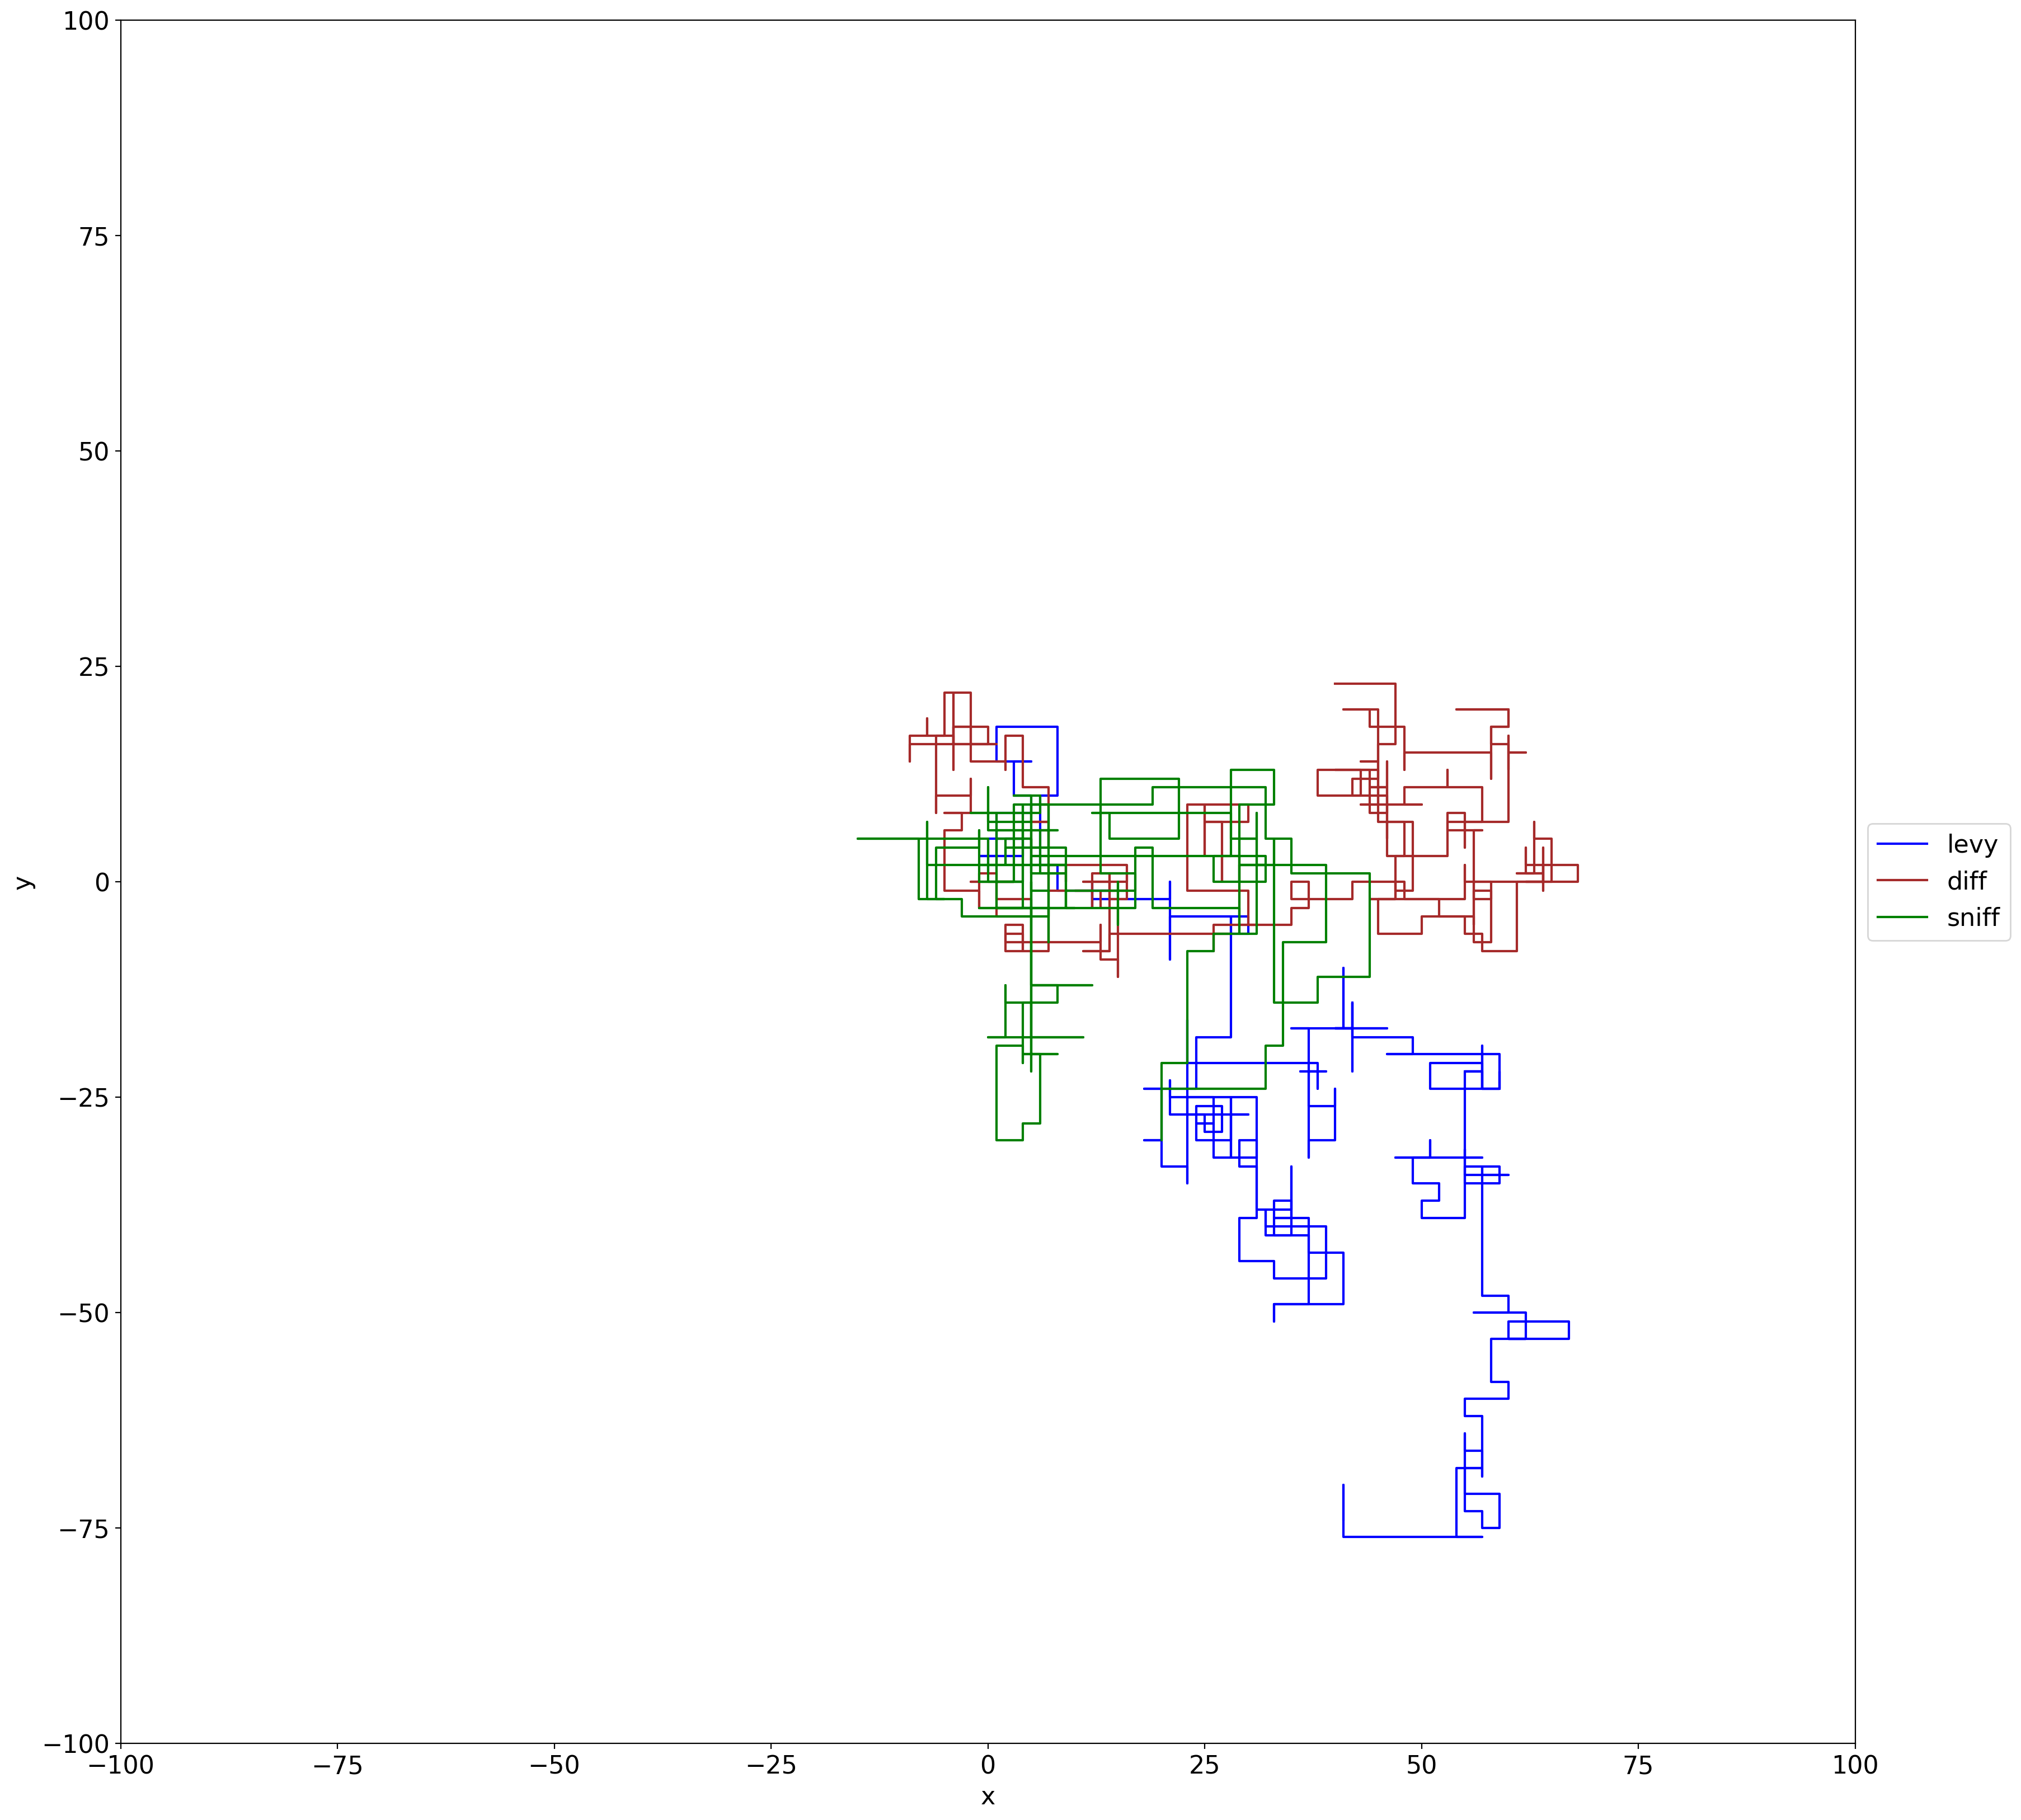

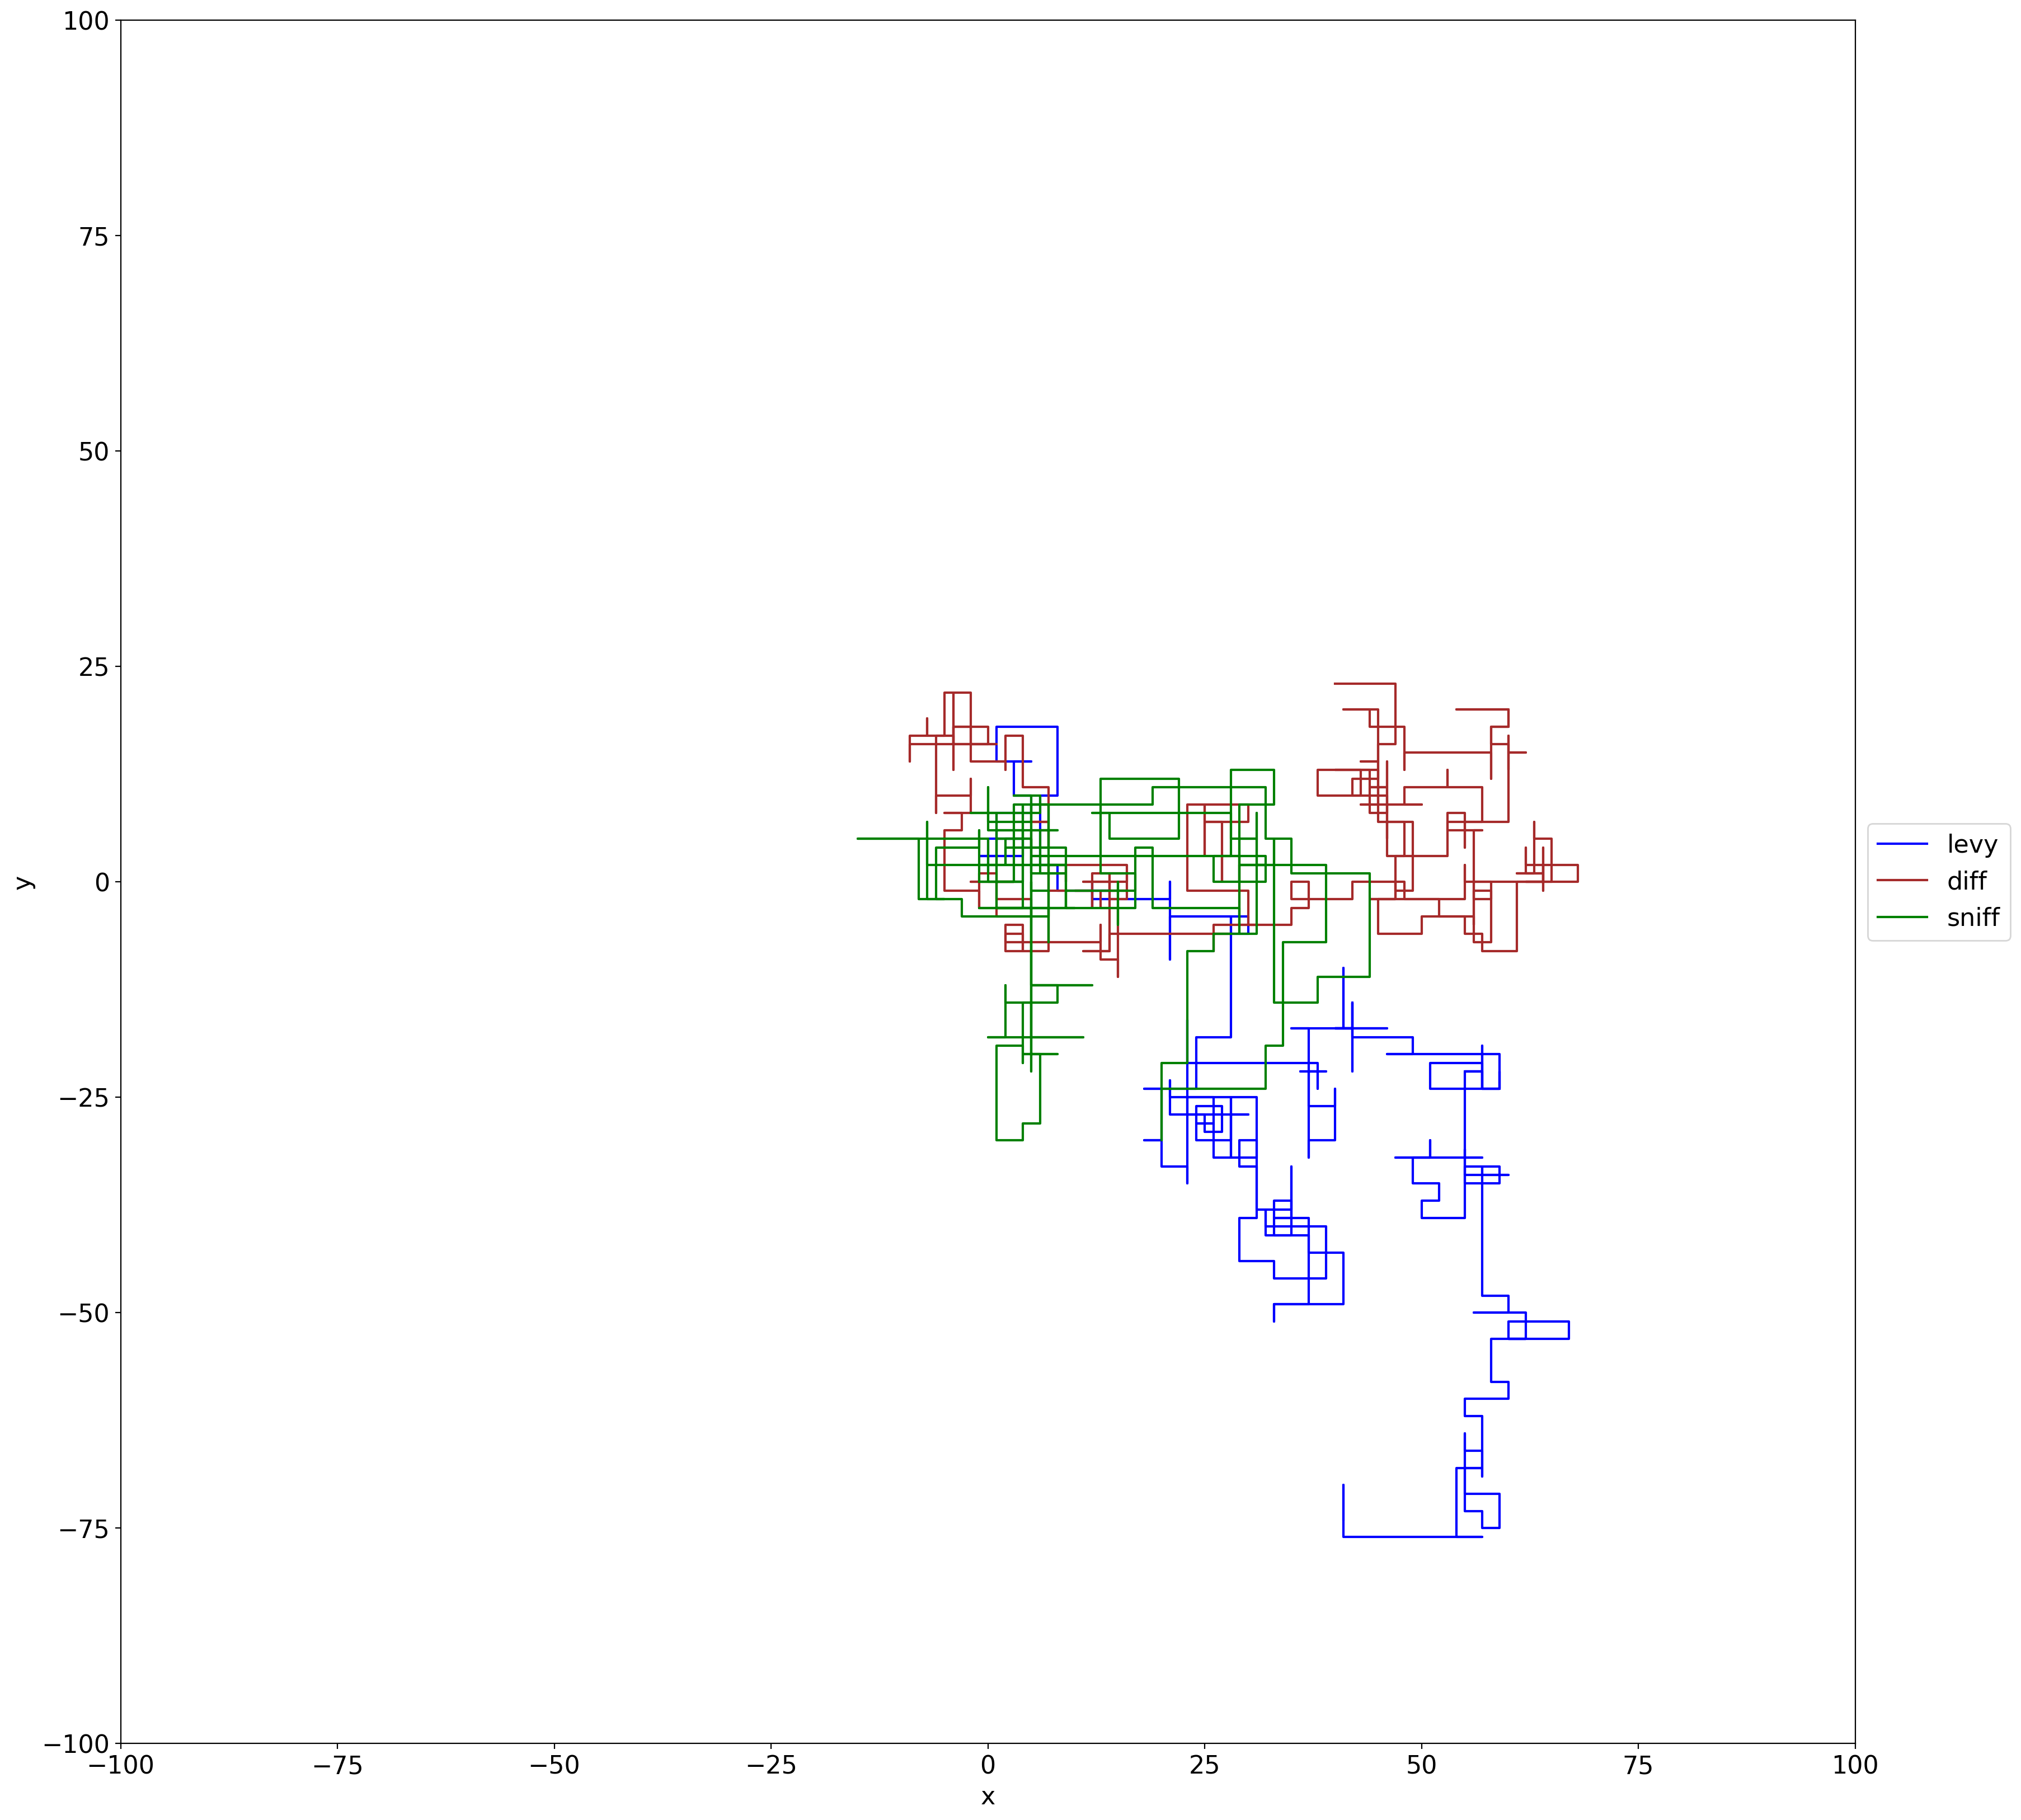

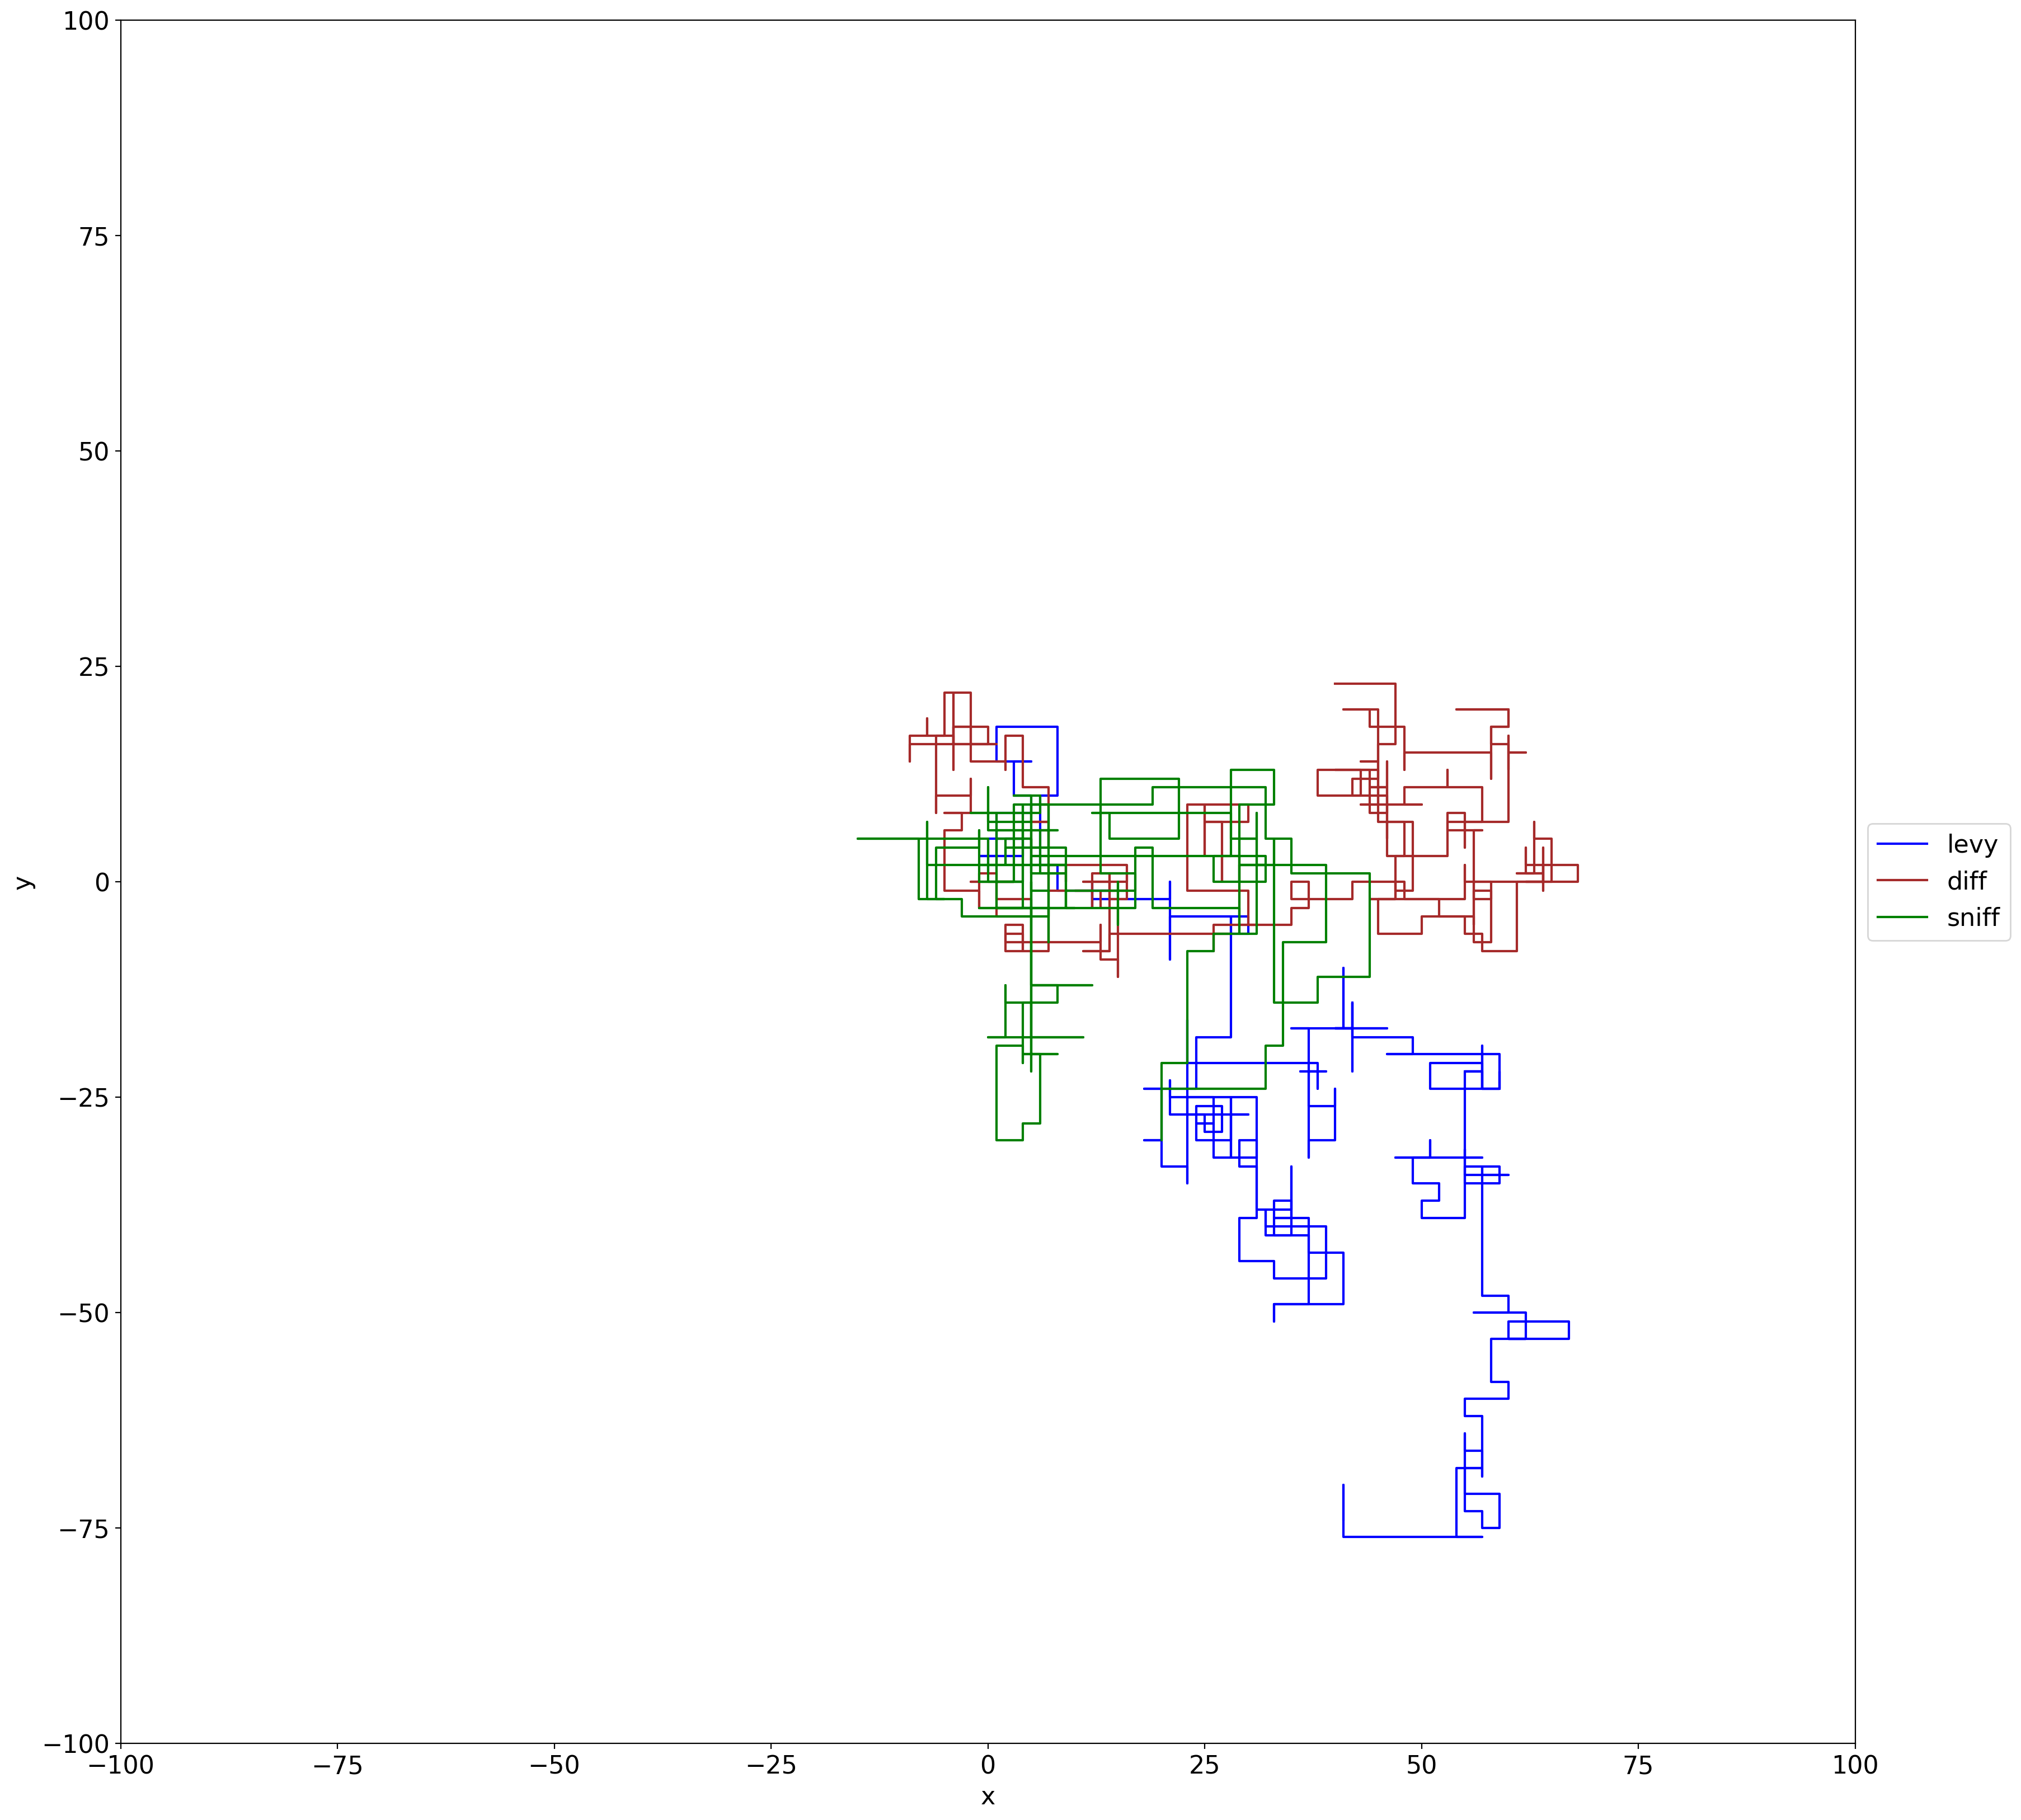

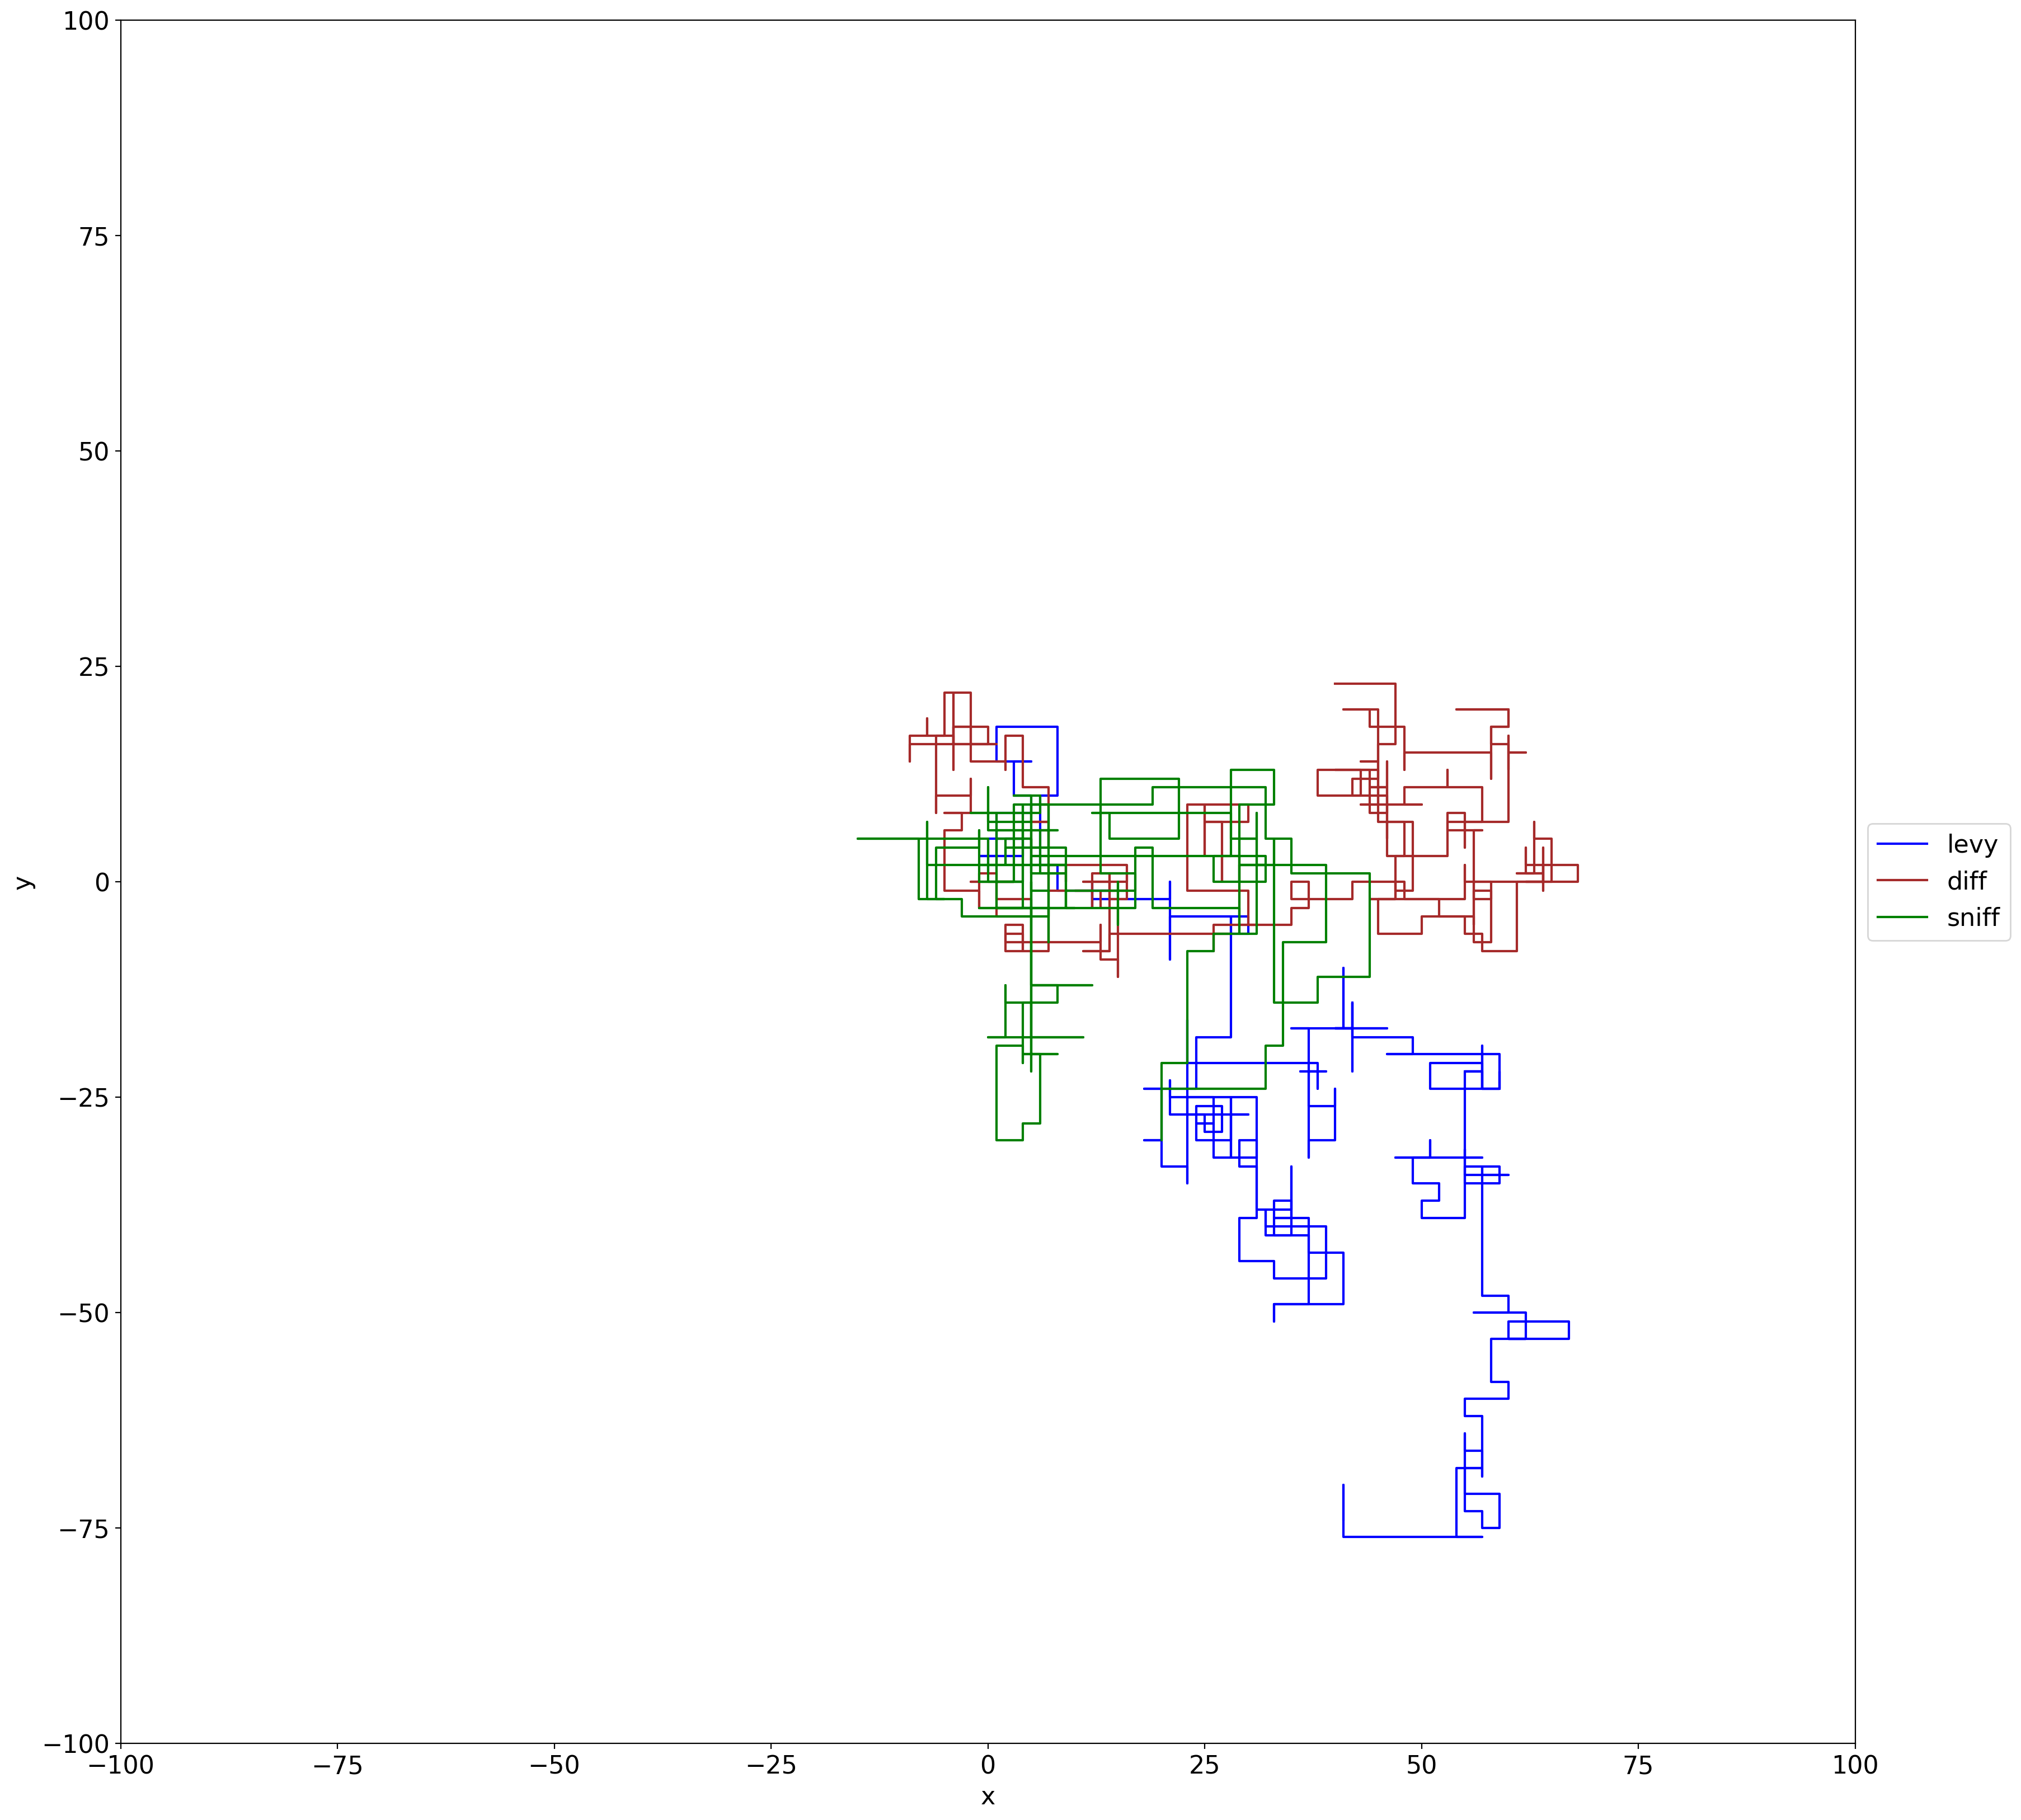

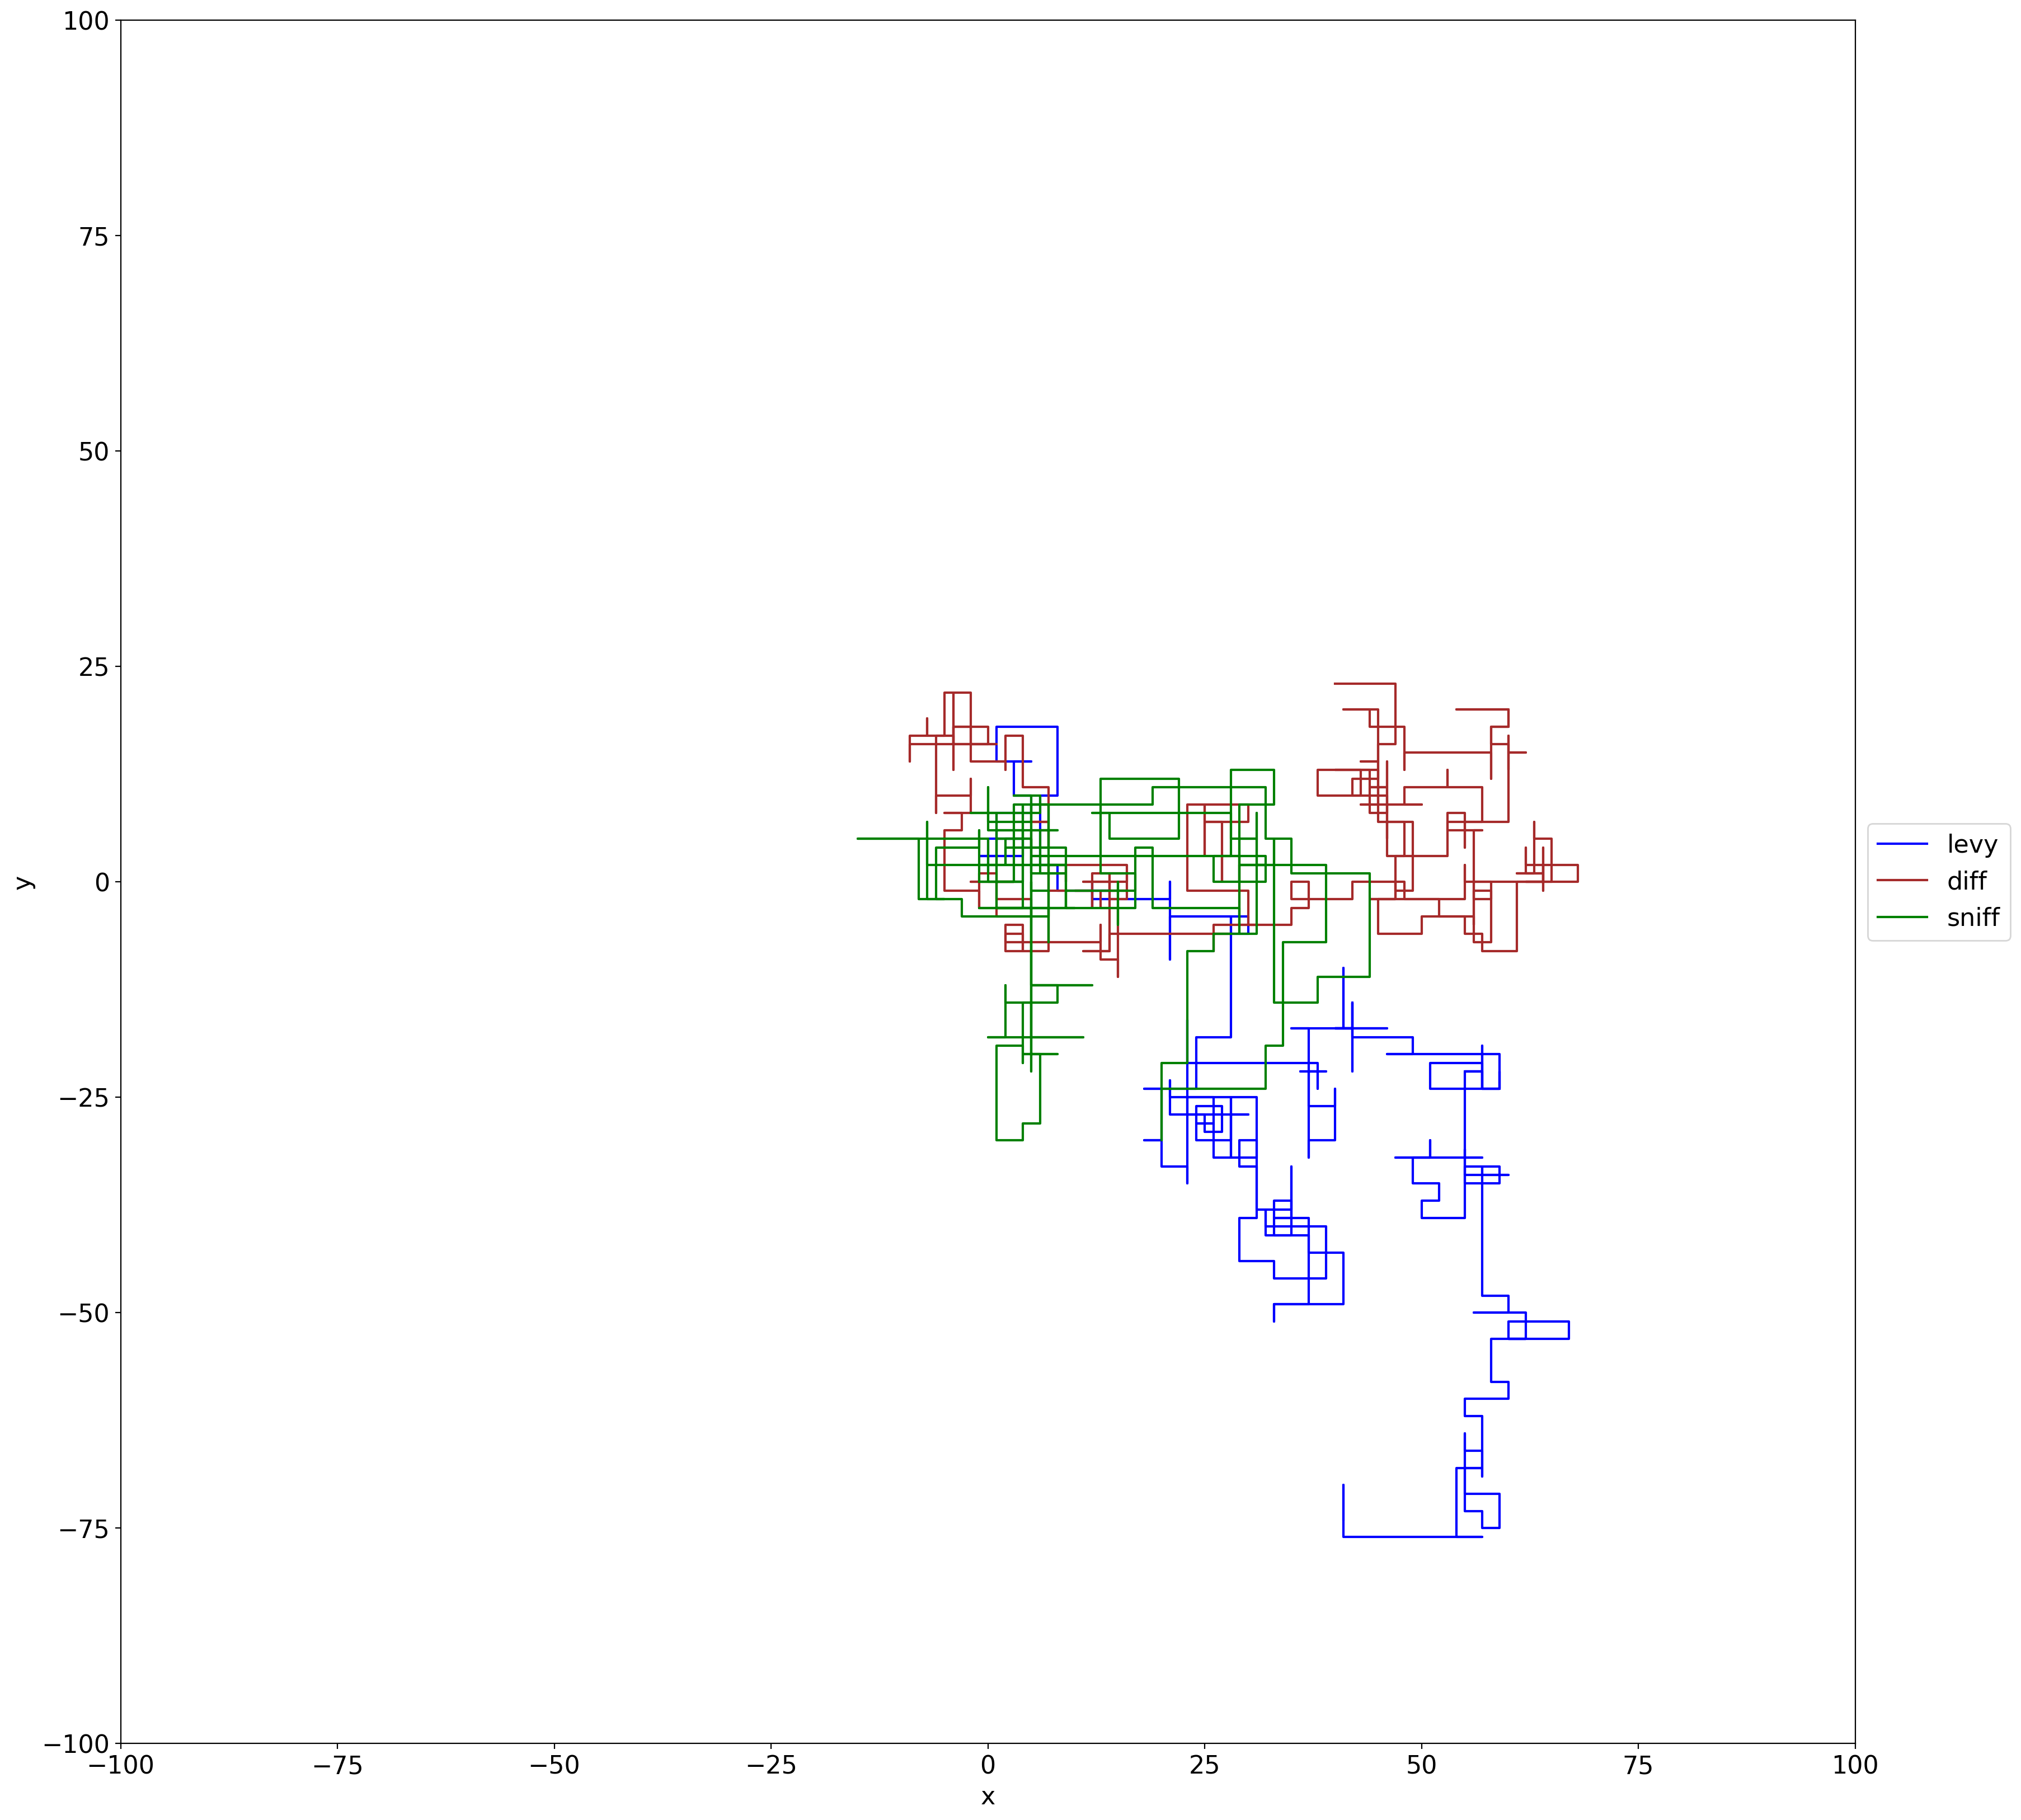

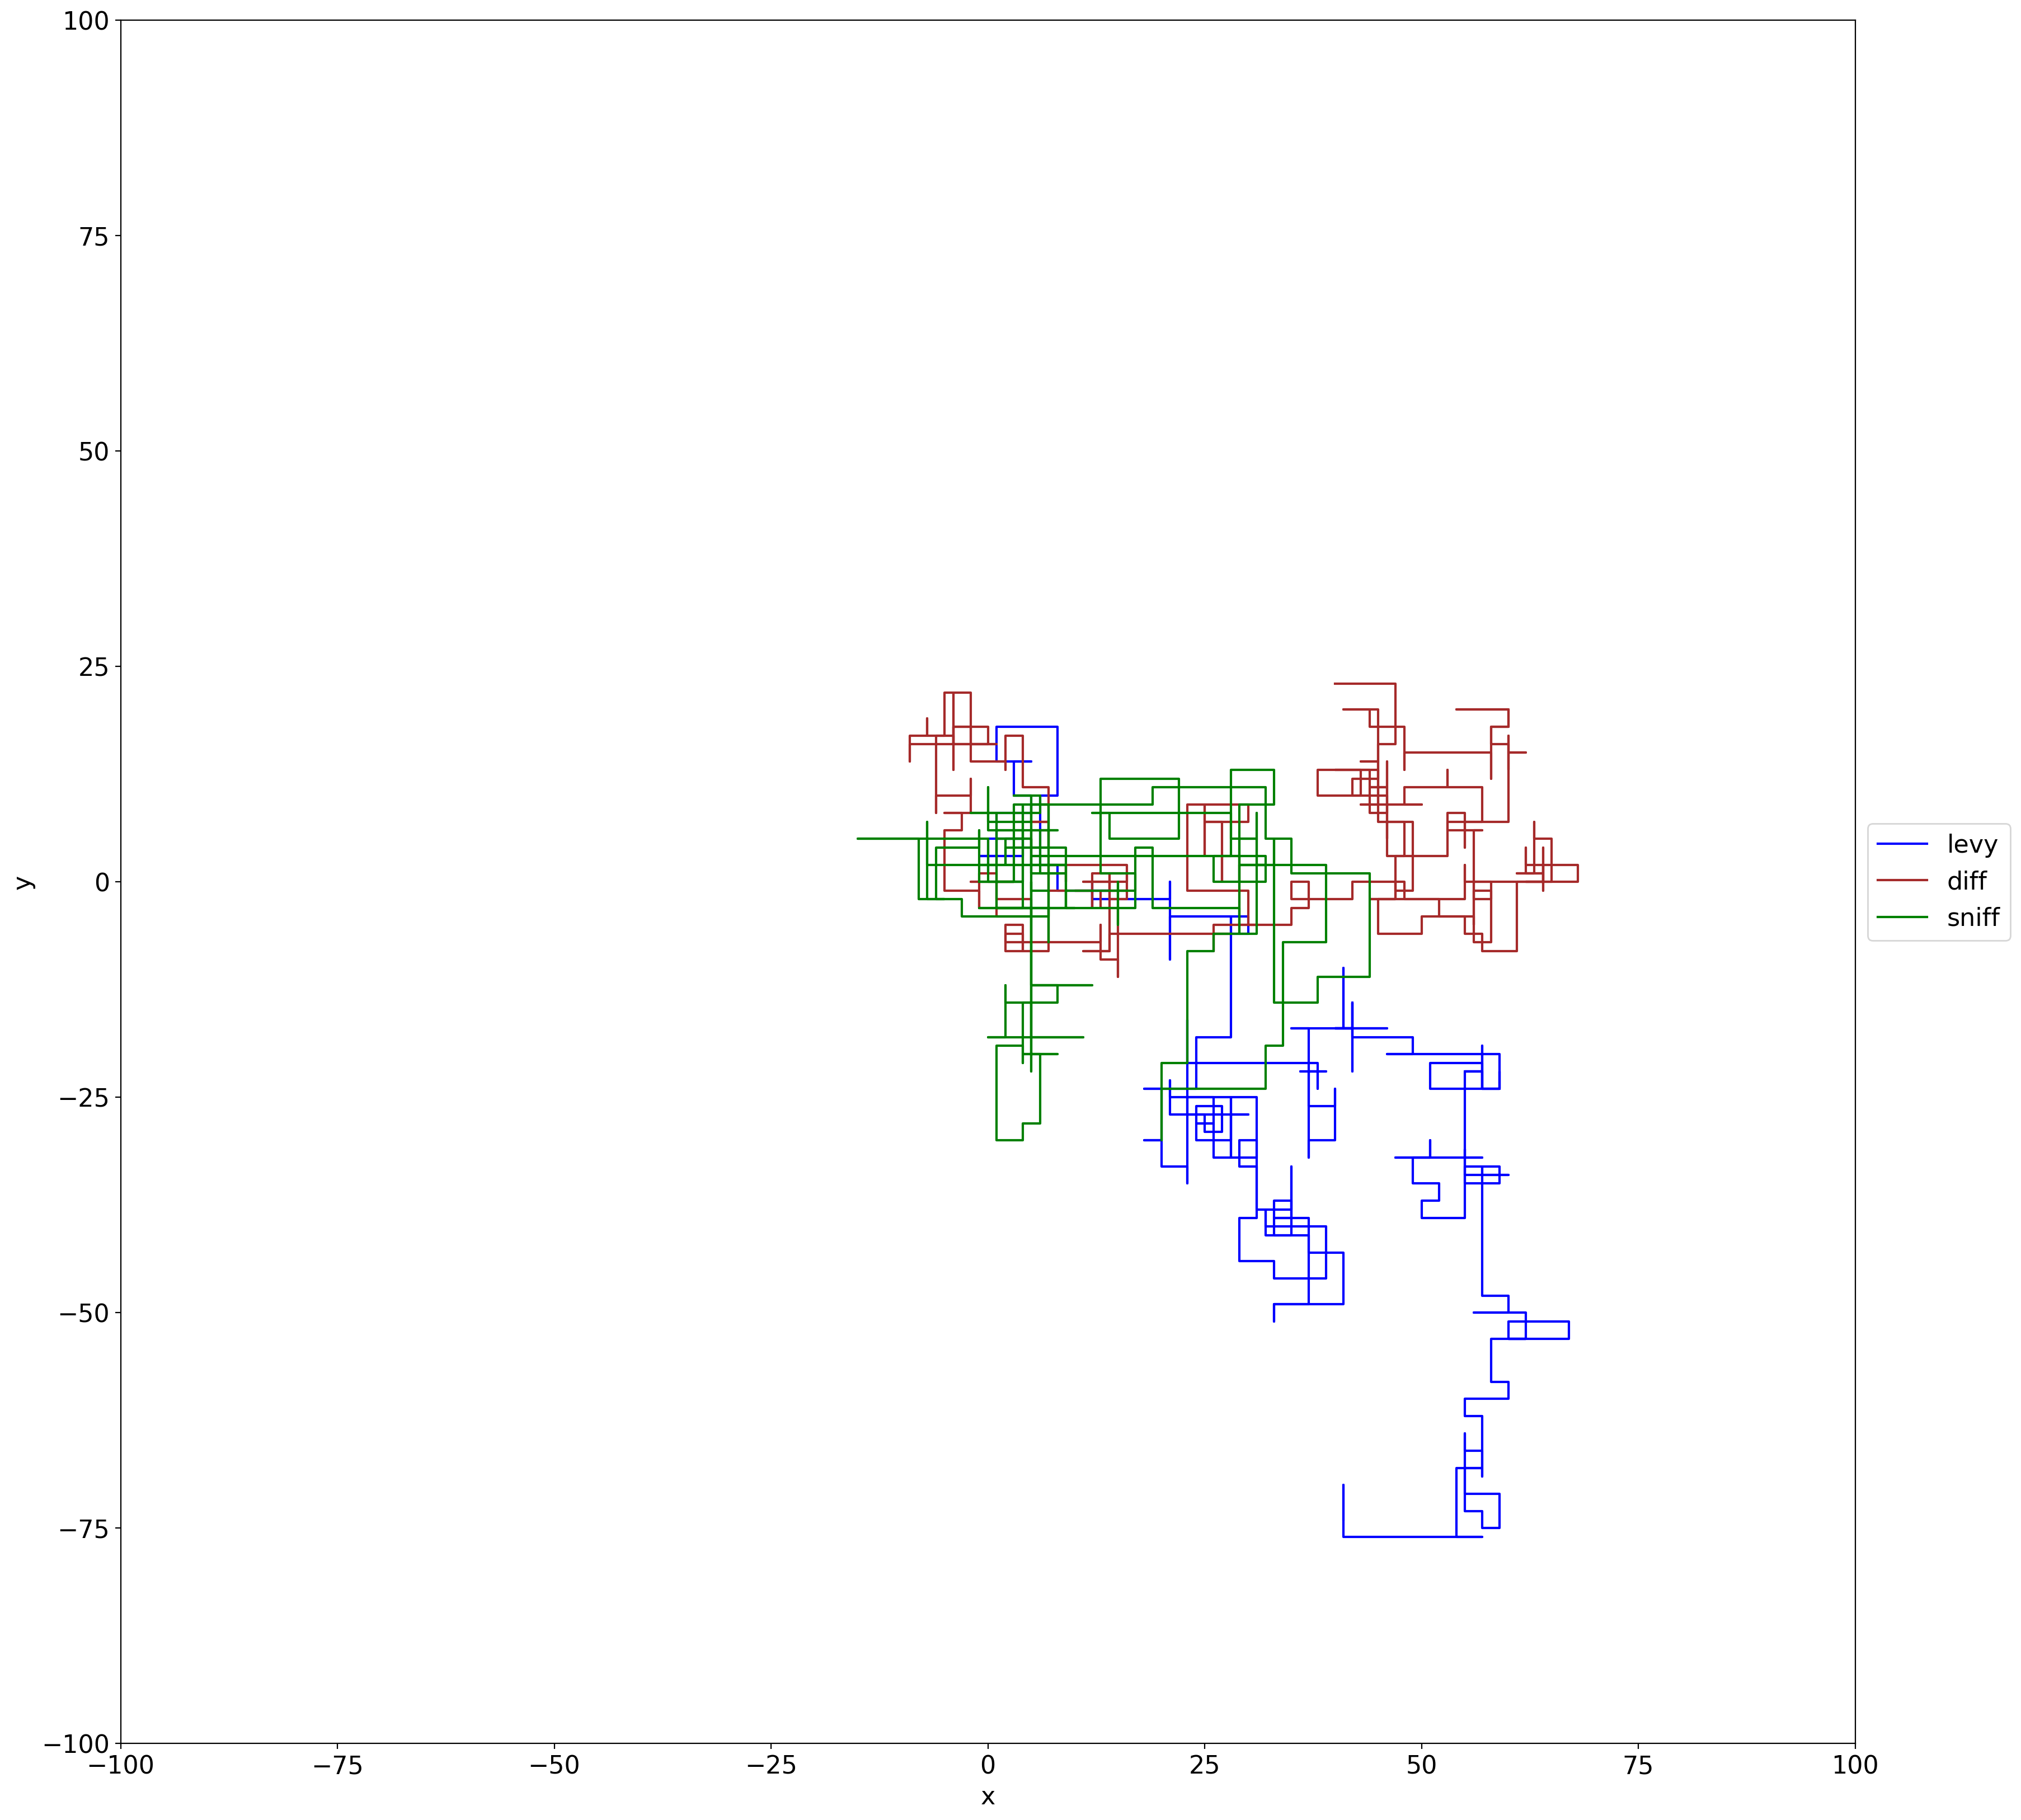

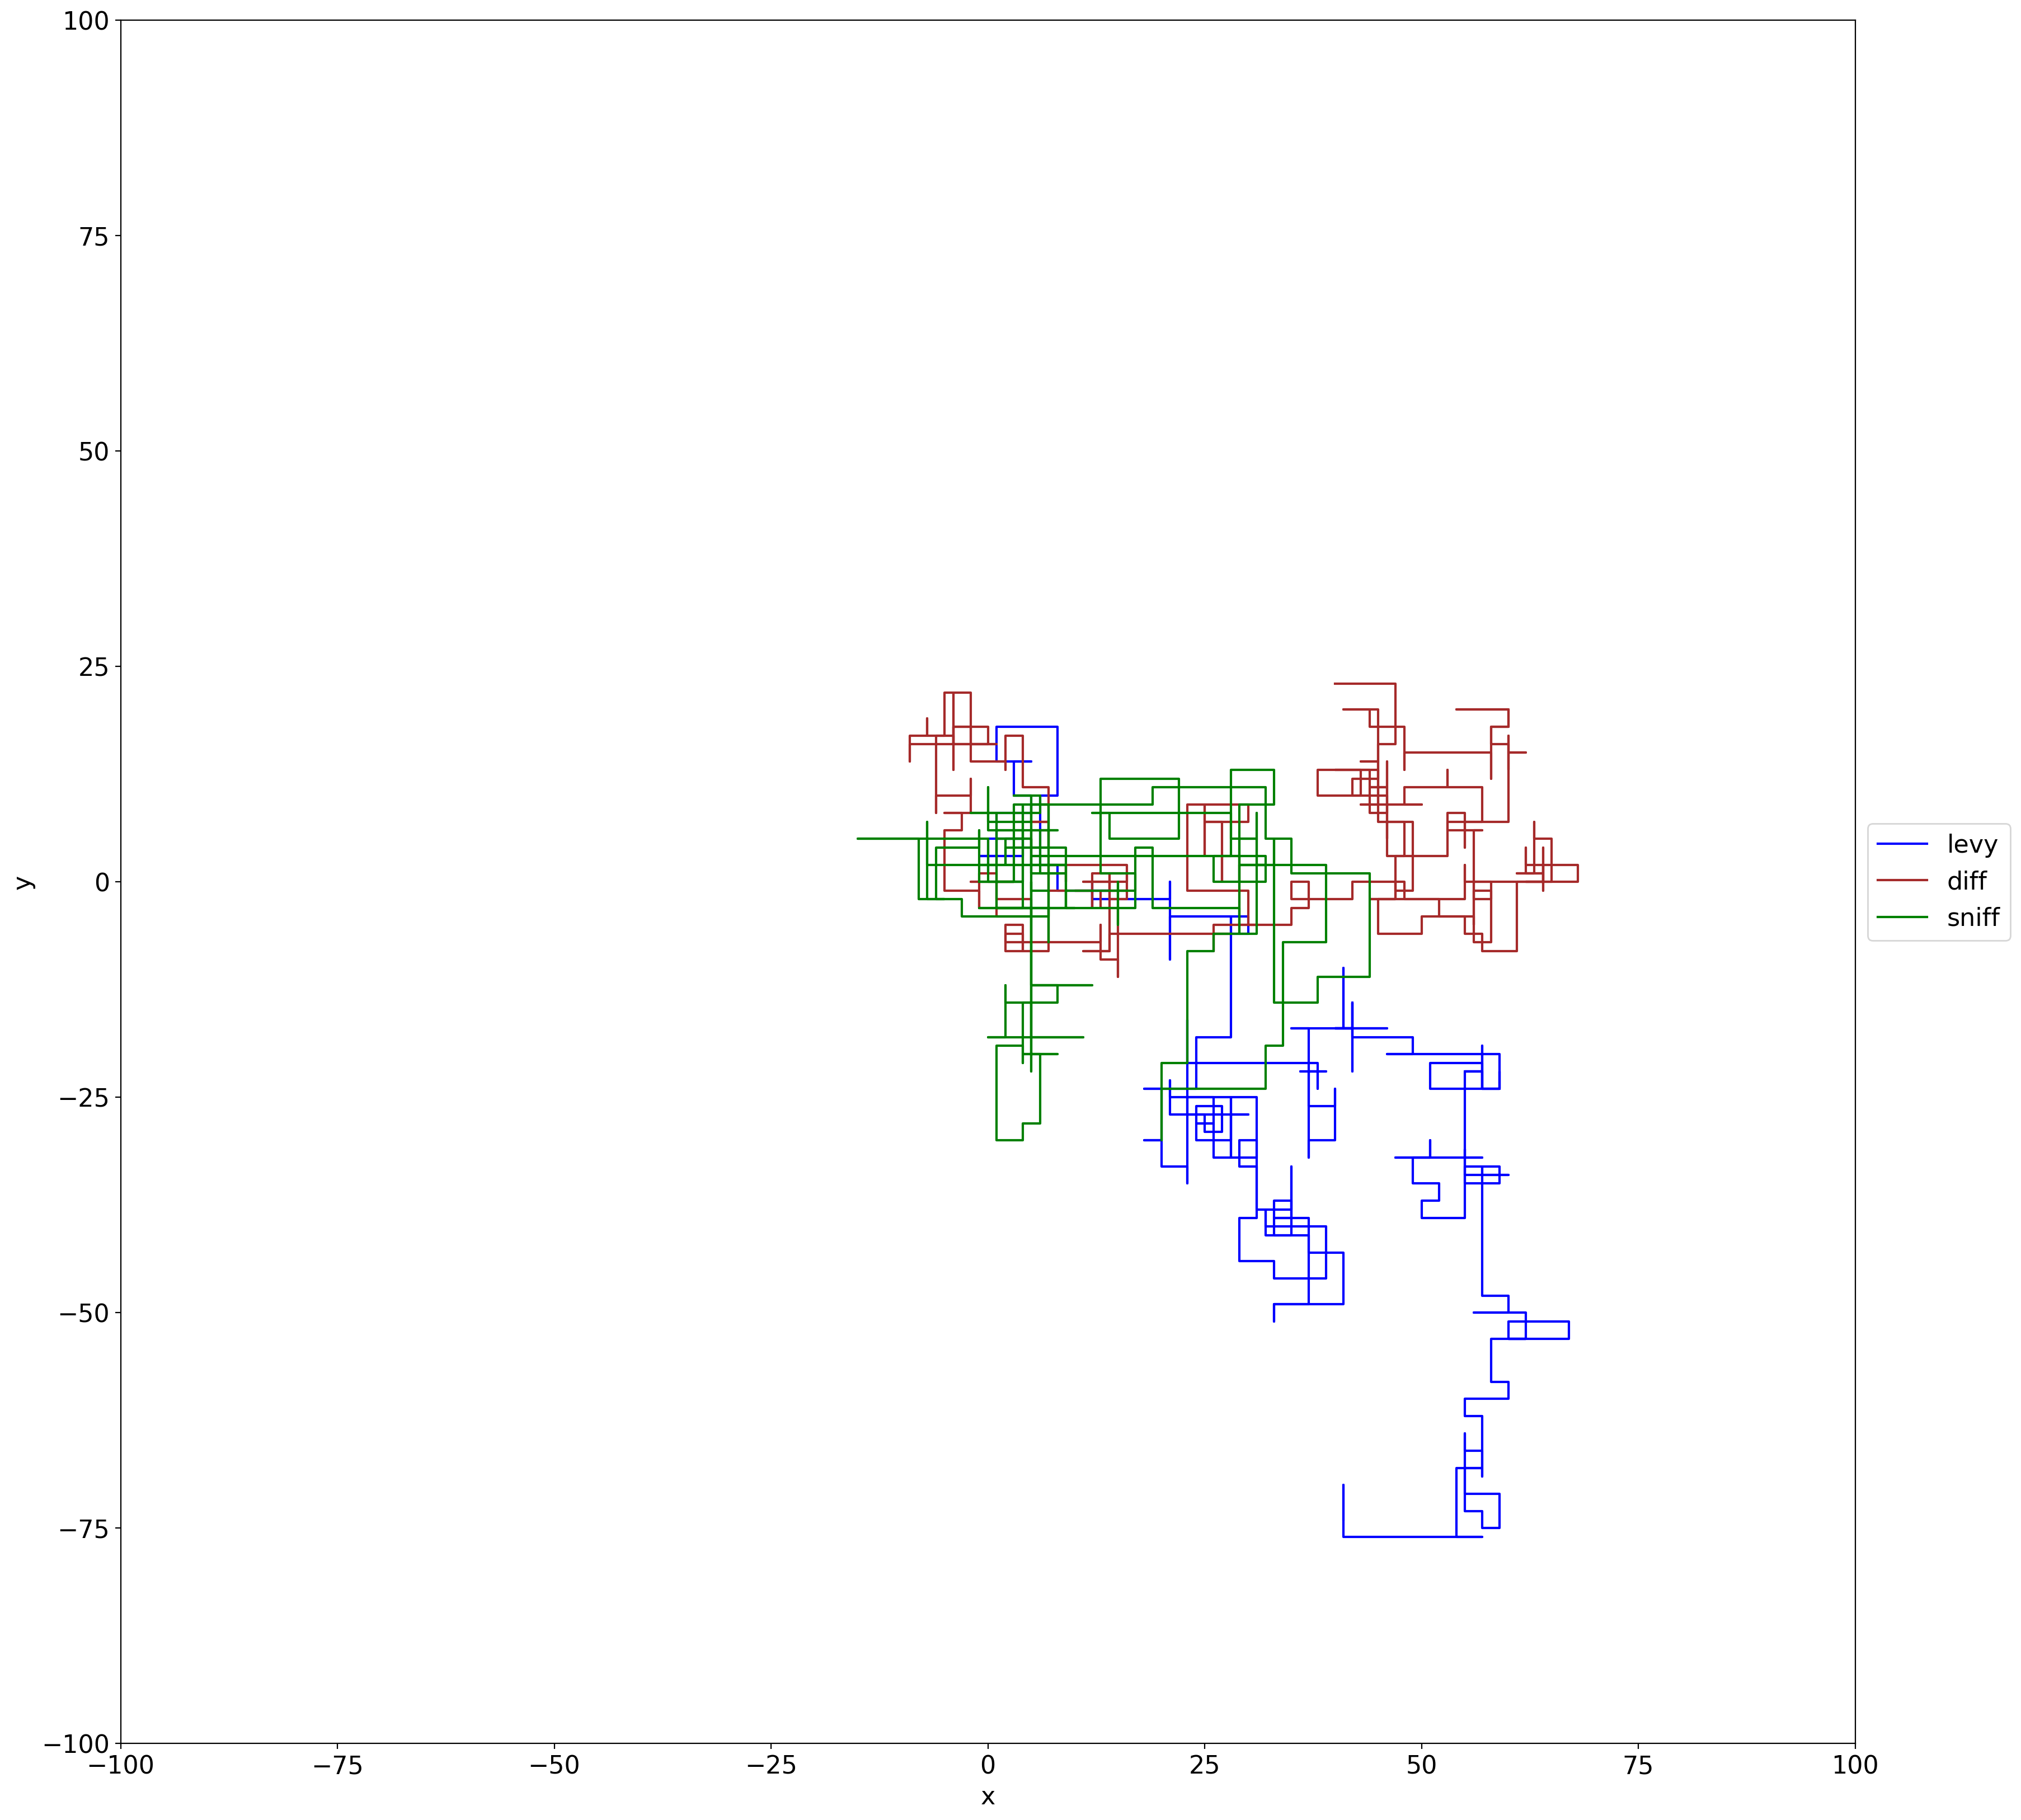

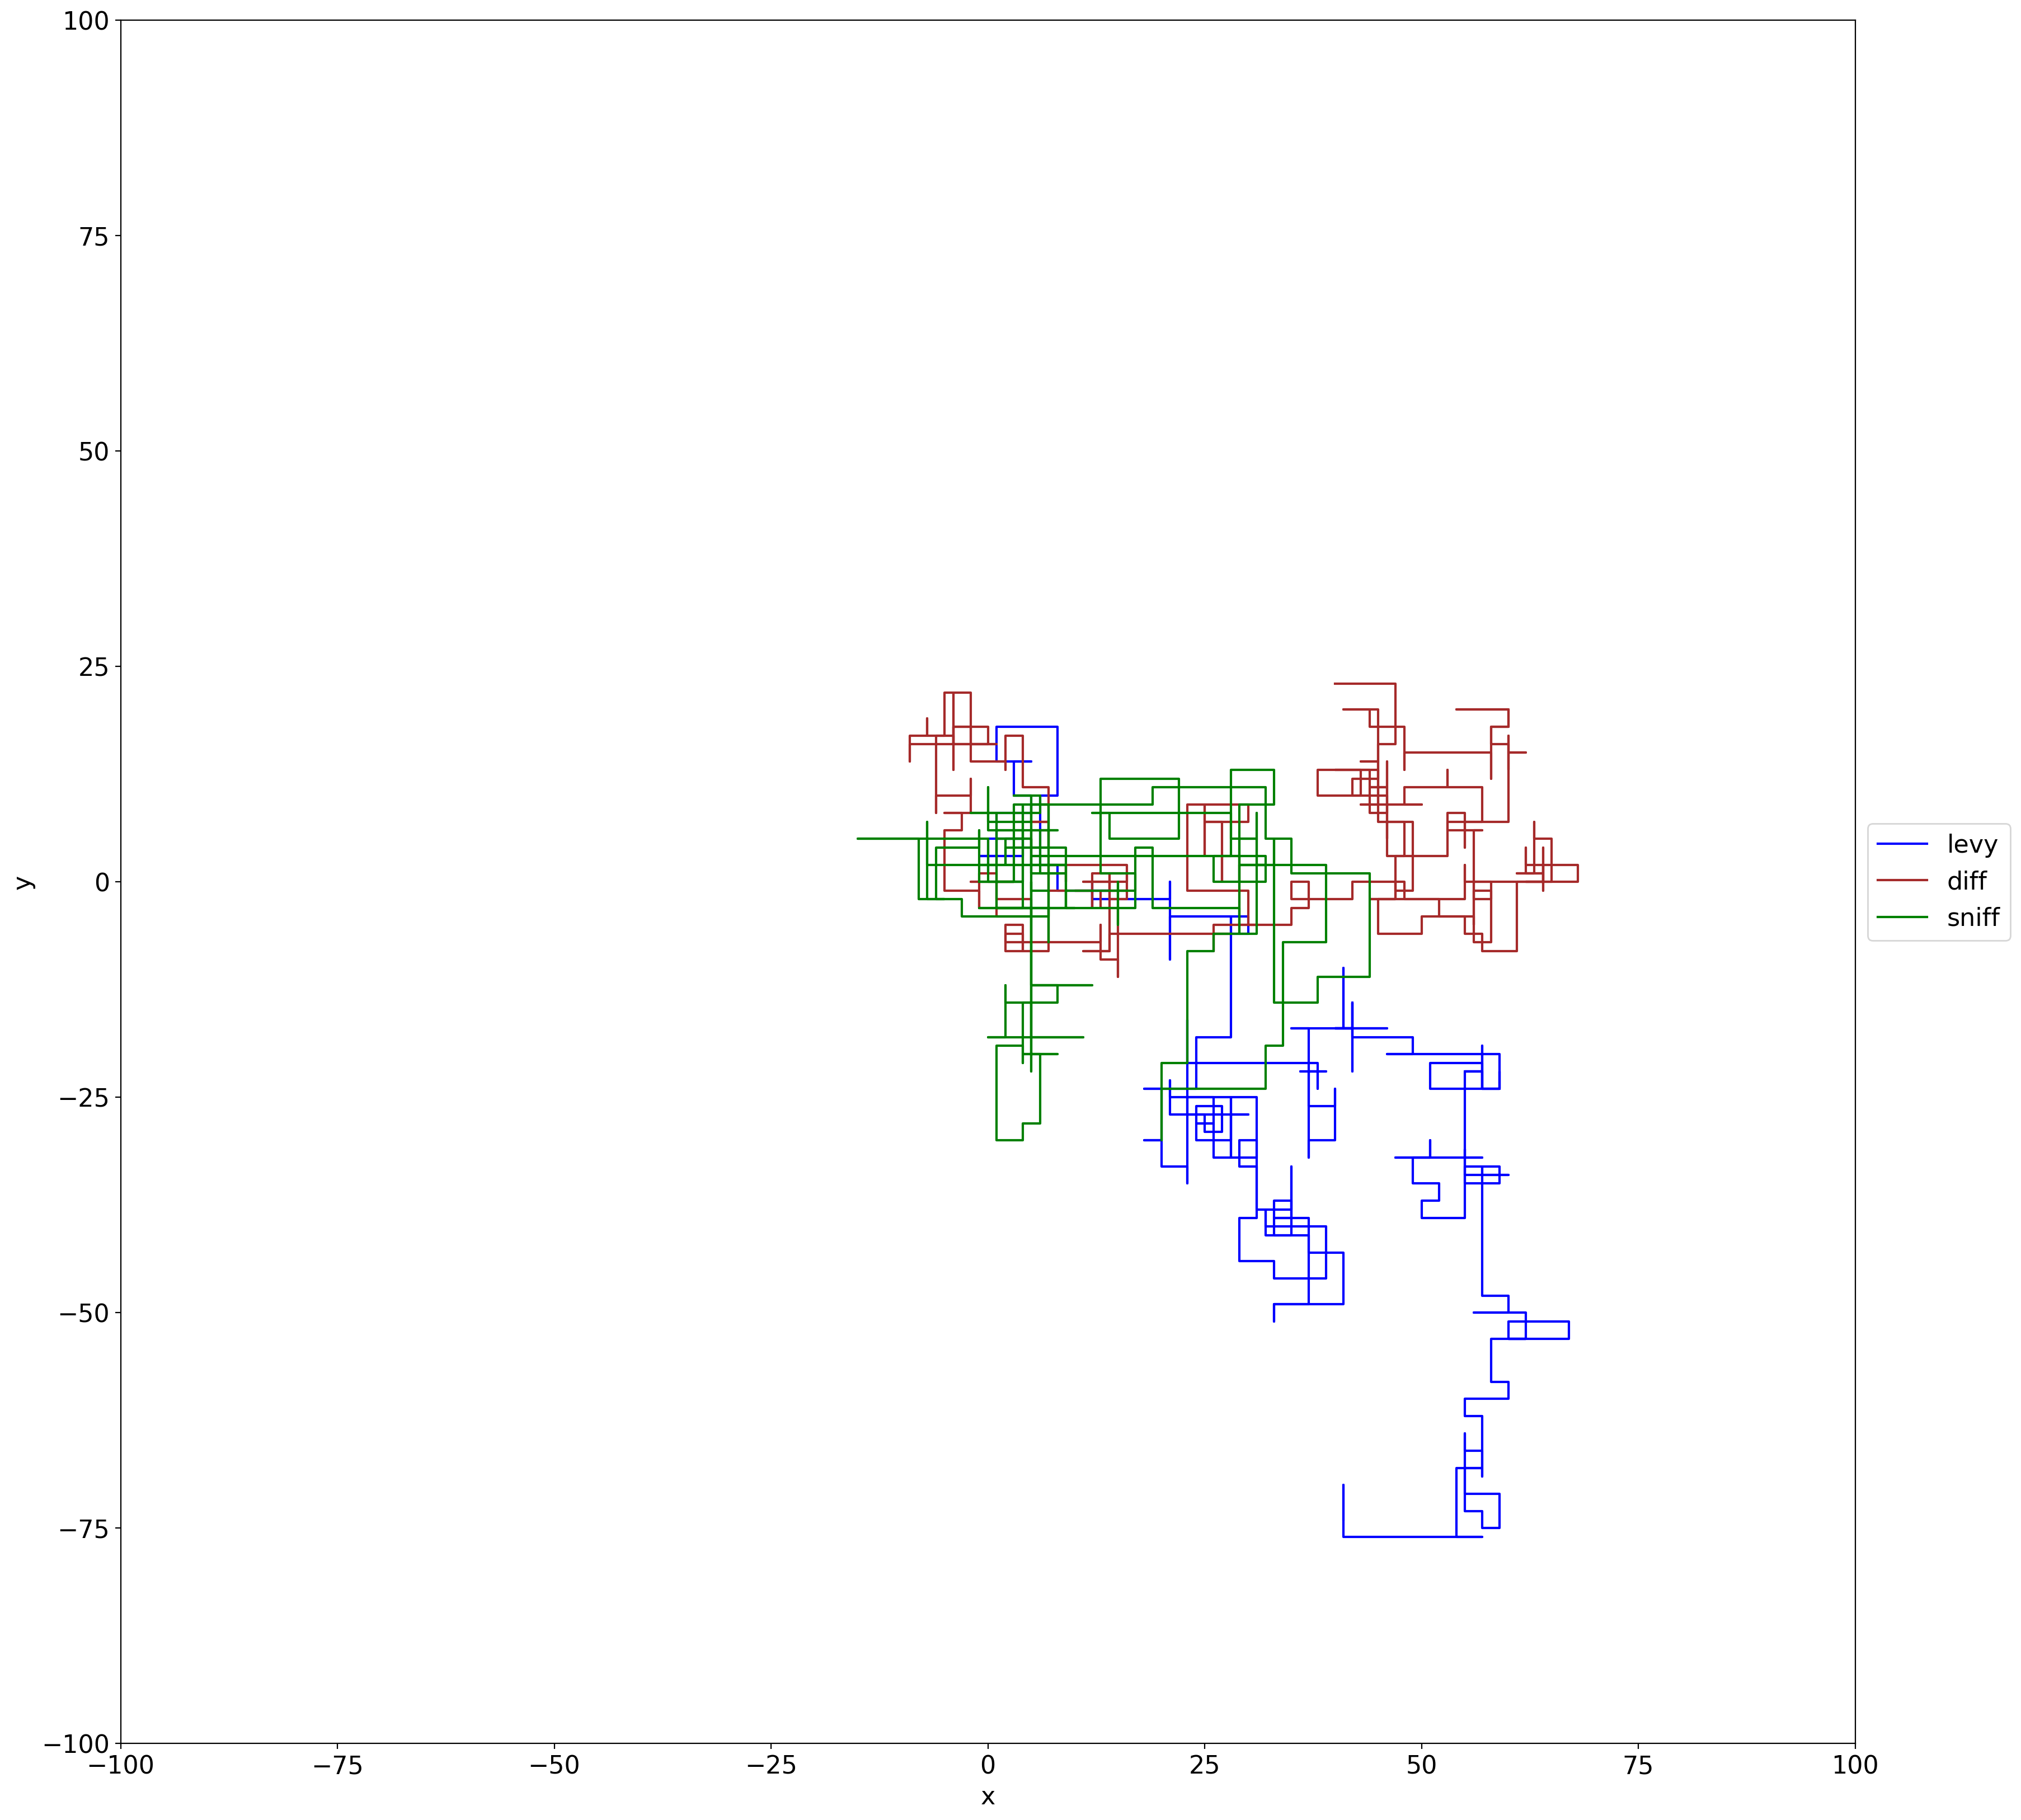

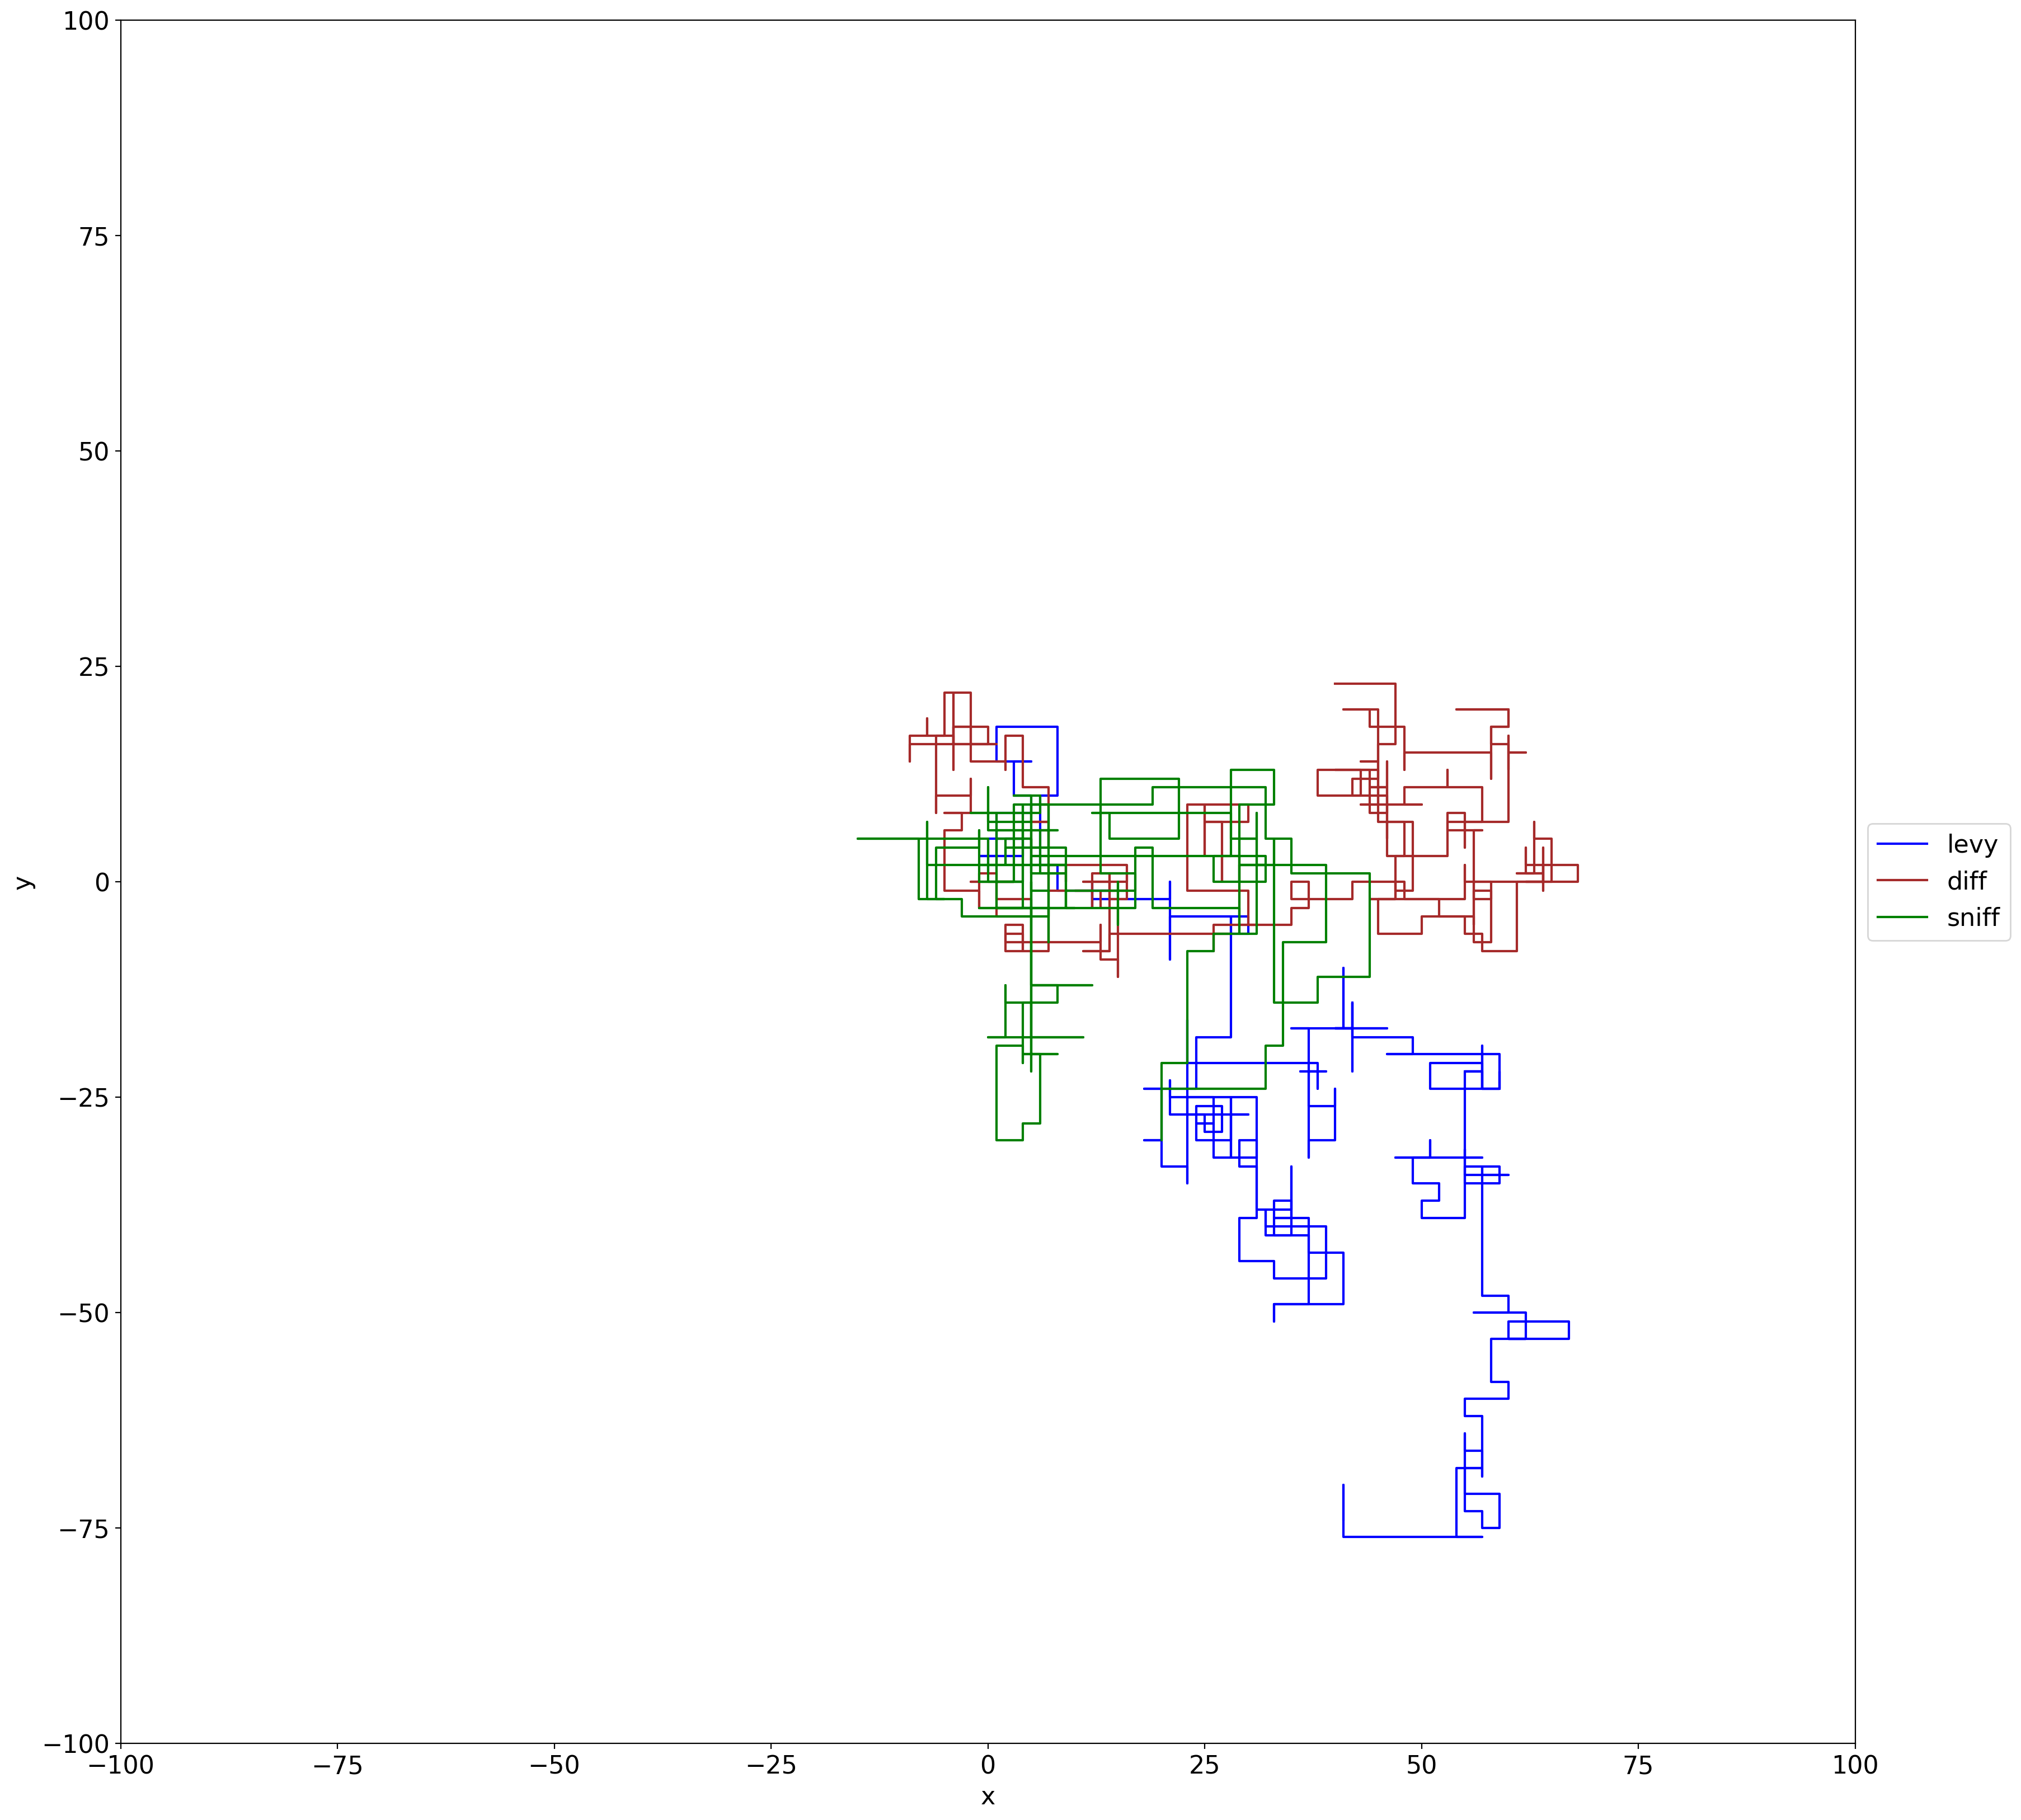

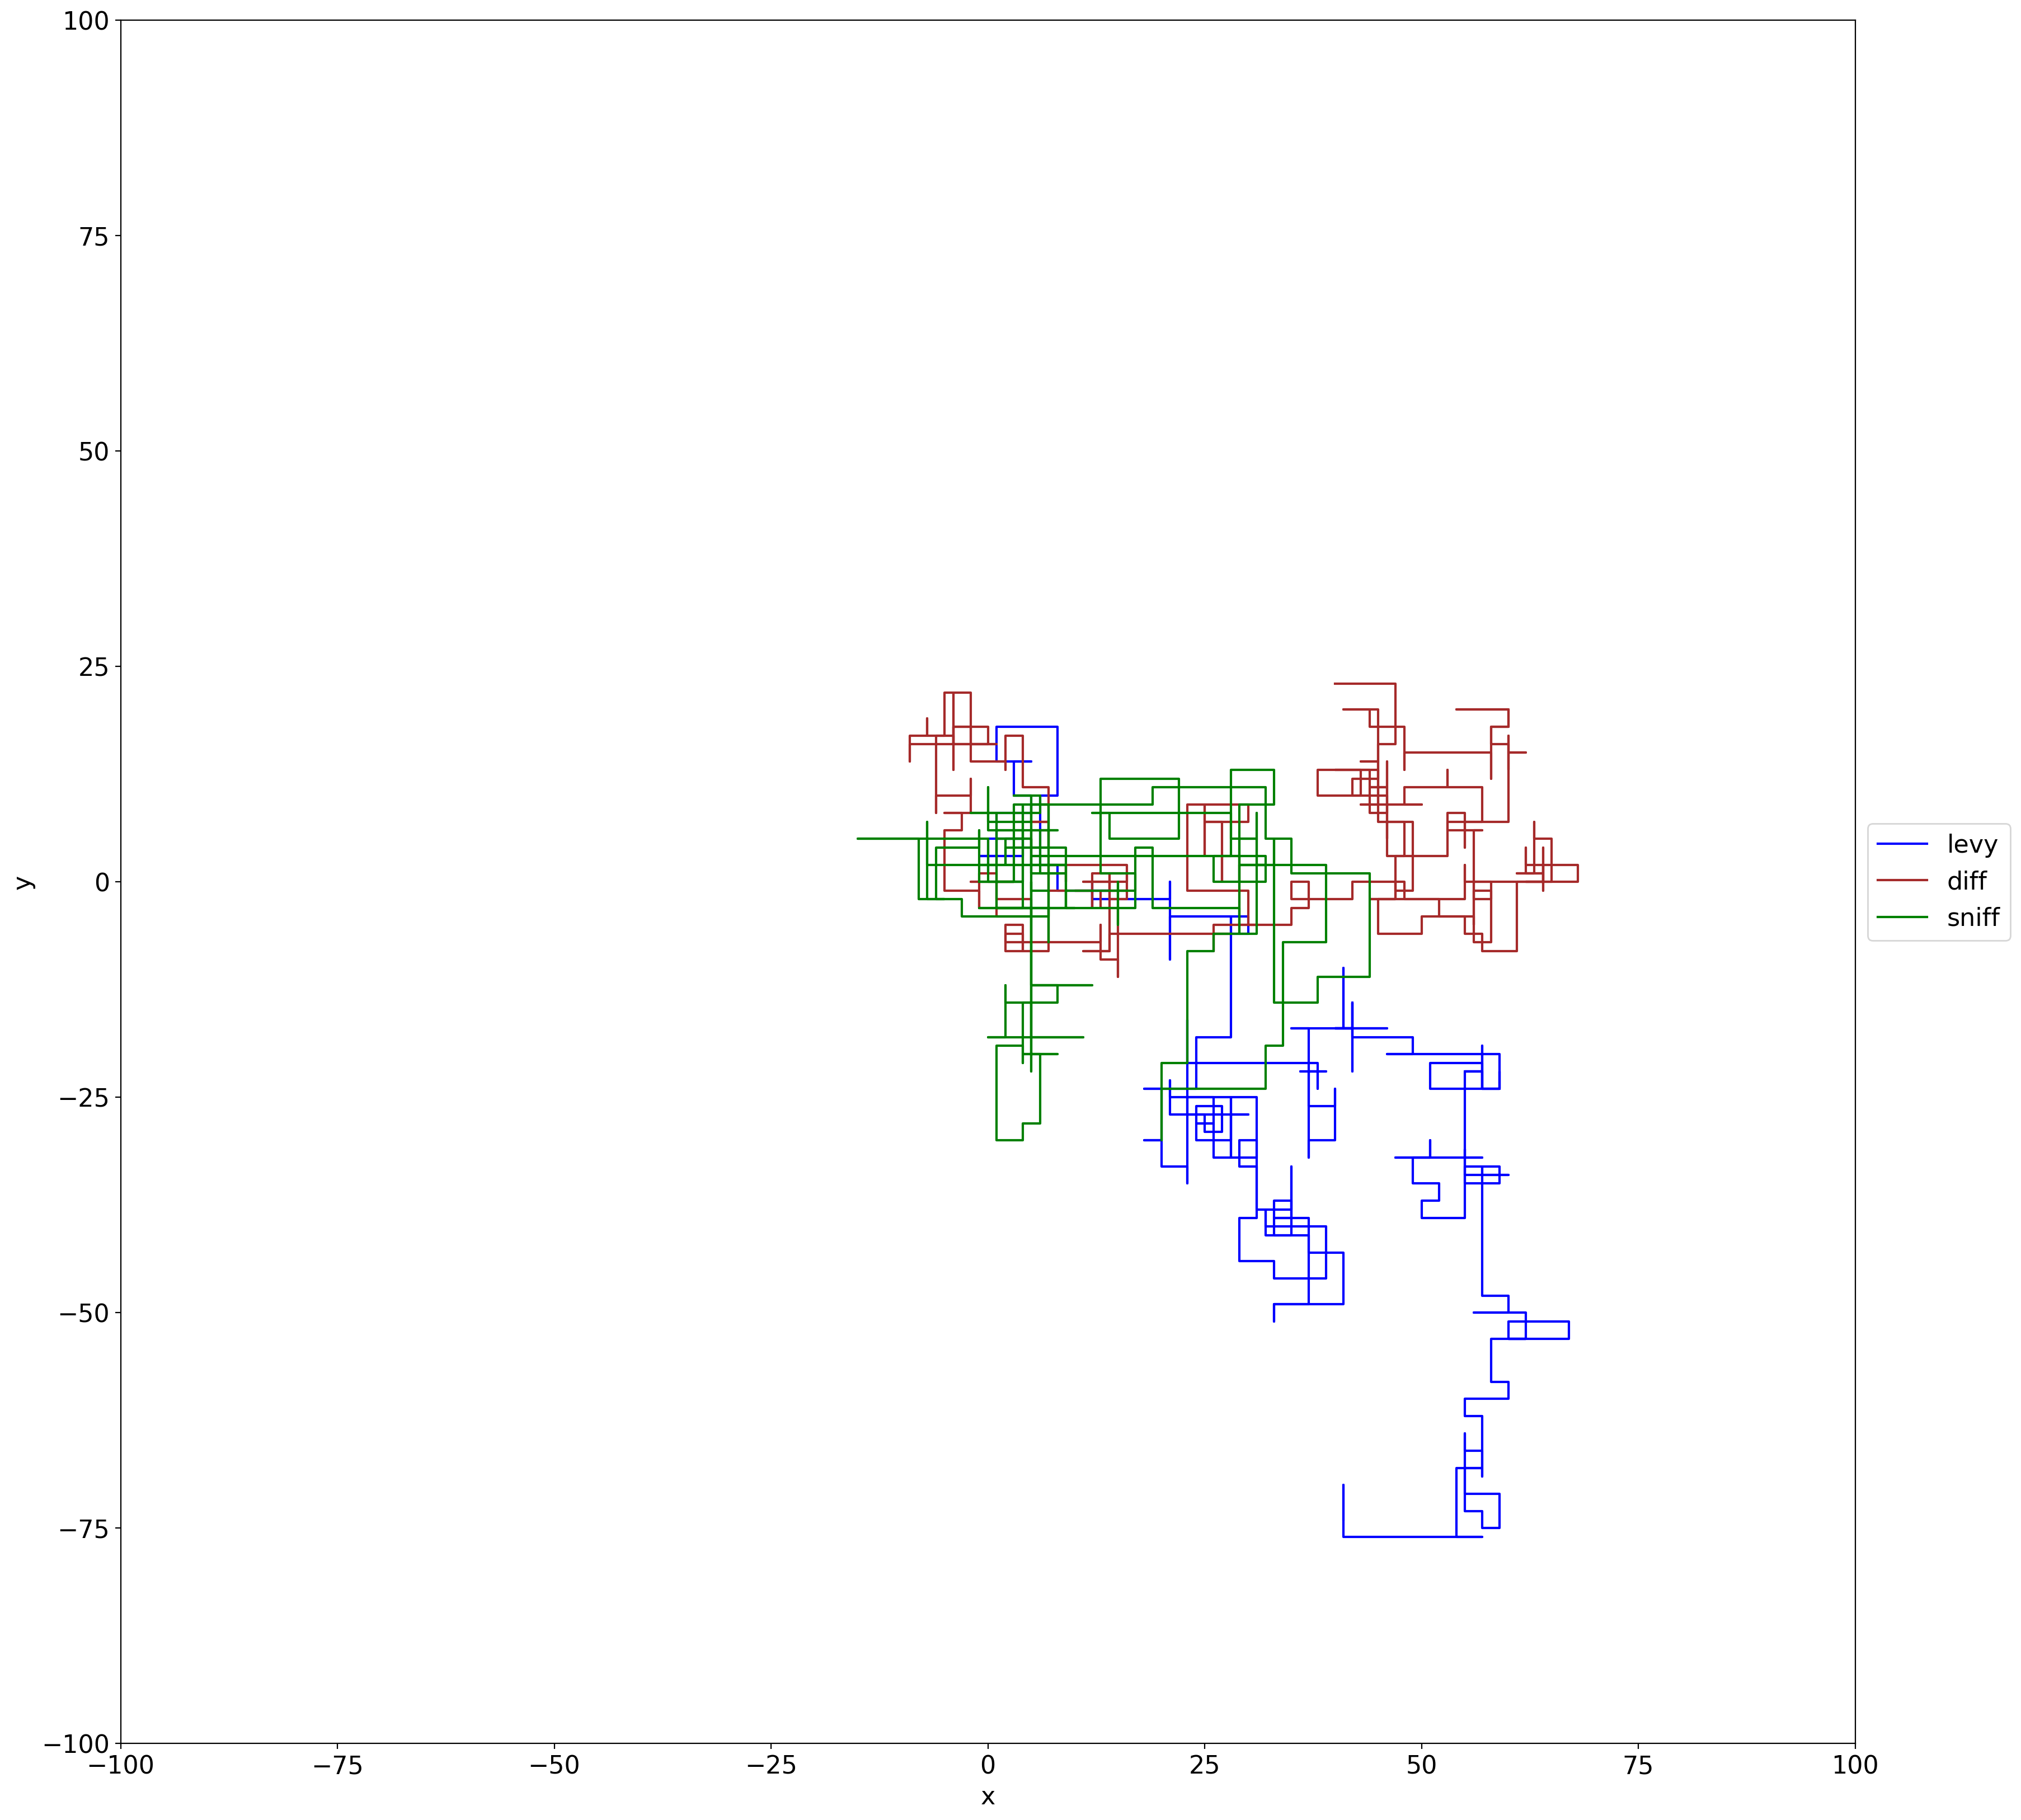

In [21]:
# View size
plot_boundary = (20, 20)

# Generate 10 plots of walking
### your code below
for n in range(num_experiments):
    ax = None
    ax = plot_position2d(
        select_exp(levy_exp, num_experiments - 1),
        boundary, plot_boundary,
        label="levy",
        color="blue",
        alpha=1,
        ax=ax,
    )
    ax = plot_position2d(
        select_exp(diff_exp, num_experiments - 1),
        boundary, plot_boundary,
        label="diff",
        color="brown",
        alpha=1,
        ax=ax,
    )

    ax = plot_position2d(
        select_exp(sniff_exp, num_experiments - 1),
        boundary, plot_boundary,
        label="sniff",
        color="green",
        alpha=1,
        ax=ax,
    )

Plot the average distances traveled for all three agents just on the first experiment (indexed at 0).

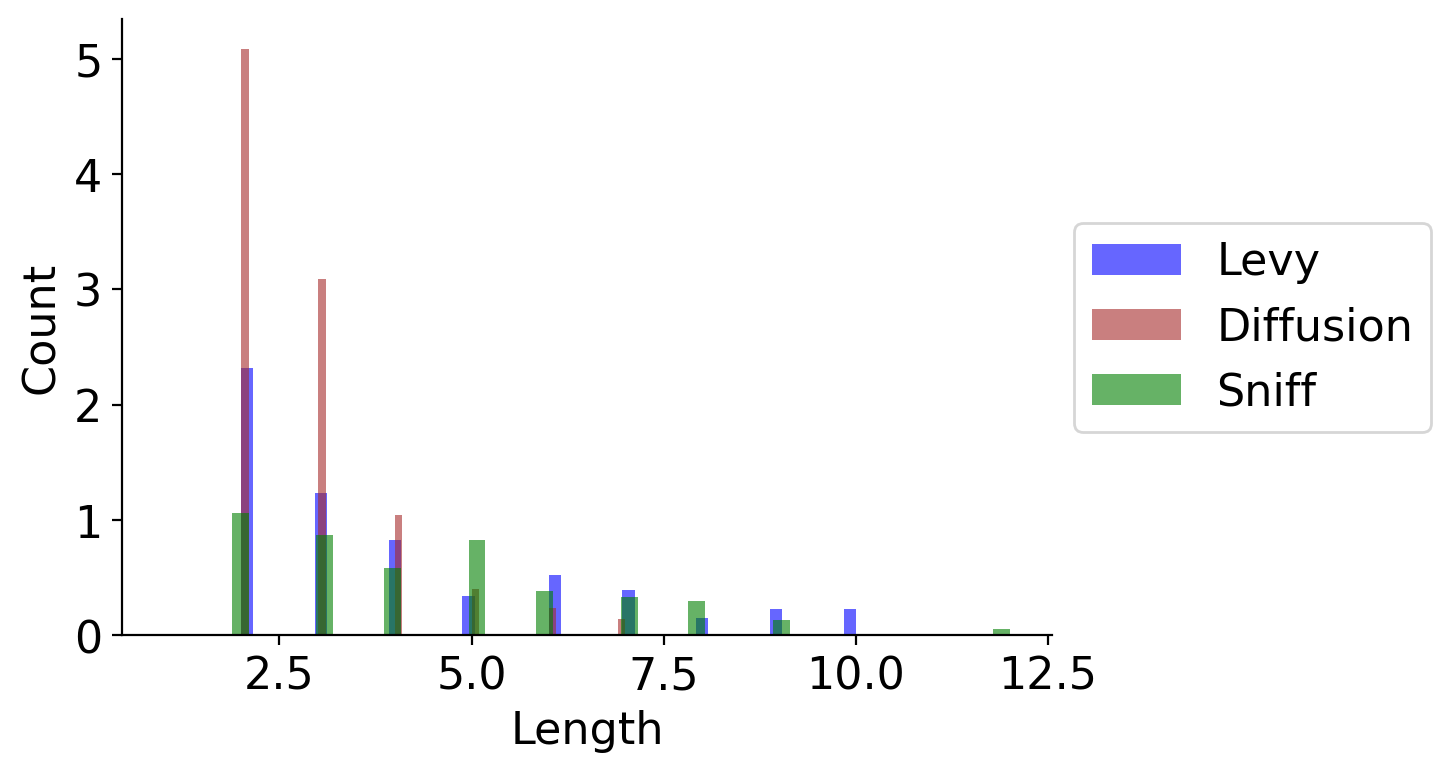

In [22]:
num_experiment = 0
ax = None
ax = plot_length_hist(
    select_exp(levy_exp, num_experiment),
    loglog=False,
    bins=50,
    density=True,
    alpha=0.6,
    label="Levy",
    color="blue",
    ax=ax,
    figsize=(6,4),
)
ax = plot_length_hist(
    select_exp(diff_exp, num_experiment),
    loglog=False,
    bins=50,
    density=True,
    alpha=0.6,
    color="brown",
    label="Diffusion",
    ax=ax,
)

ax = plot_length_hist(
    select_exp(sniff_exp, num_experiment),
    loglog=False,
    bins=50,
    density=True,
    alpha=0.6,
    color="green",
    label="Sniff",
    ax=ax,
)
sns.despine() # Make pretty plot

### Summarize the performance [10 pt]

Next plot the average scores for each agent. See plotting in Lab 2 for help.

total_reward:   0%|          | 0/10 [00:00<?, ?it/s]

total_reward:   0%|          | 0/10 [00:00<?, ?it/s]

total_reward:   0%|          | 0/10 [00:00<?, ?it/s]

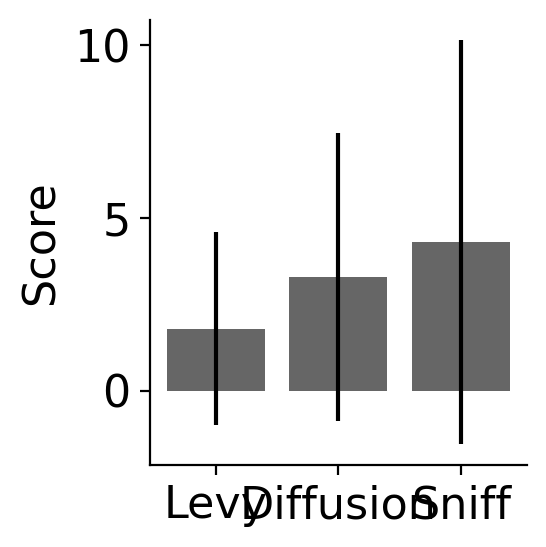

In [23]:
# Results, names, and colors
results = [levy_exp, diff_exp, sniff_exp]
names = ["Levy", "Diffusion", "Sniff"]
colors = ["blue", "brown", "green"]

# Score by efficiency
scores = []
for result in results:
  r = total_reward(result)
  scores.append(r)

# Tabulate means and standard deviations
m, sd = [], []
# m is mean
# sd is standard deviation
for (name, s, c) in zip(names, scores, colors):
  m.append(np.mean(s))
  sd.append(np.std(s))

# Plot
fig = plt.figure(figsize=(3, 3))
plt.bar(names, m, yerr=sd, color="black", alpha=0.6)
plt.ylabel("Score")
plt.tight_layout()
sns.despine()

### Question 1.1 [5 pt]

Do you notice any tangible differences between the two random agents and the agent that uses sensory information?

In [ ]:
# Yes, the agent using sensory information seems to outperform both random
# agents. As seen in the figure above, the sniff agent has a greater score than
# the levy and diffusion agents.


## Task - Decreasing Scent Radius

Rerun the code in the previous section, but changing the scent radius (how far scent diffuses from each target) of the environment from 10 to 1.

### Question 1.2 [5 pt]

How does the performance of the agents change?

In [ ]:
# When the scent radius is decreased from 10 to 1, the diffusion agent becomes
# the highest performing agent, followed by the sniff agent, and the levy agent
# remains the worst performing agent. It can also be noted that this shift only
# seems to occur because the sniff agent's score decreases while the levy and
# diffusion agent perform the same.


### Question 1.3 [5 pt]

Speculate why the reduction in the scent radius caused the change reported in Question 1.2.

In [ ]:
# We know the if the sniff agent detects a scent gradient it moves up it until
# the gradient decreases, then it moves again. Therefore, if we decrease how far
# the scent diffuses from each target, especially by such a drastic amount, we
# remove the advantage of a sniff agent. As seen from the change in result,
# a reduction in the scent radius to 1 produces a relatively "random" sniff
# agent.


---
## Part 2 - Signal Detection Theory

Now we are going to pivot to working on playing with signal detection theory.

### Task - Calculate $d'$ and $c$ directly [10 pt]

In the code cell below, calculate and print the $d'$ and $c$ values that we would expect from a *hit rate* of 0.85 and *false alarm* rate of 0.30, given the assumptions of SDT.

In [25]:
from scipy.stats import norm # import statistical library for inverse norms

# set your hit and FA rates to calculate resulting d' and c values
p_hit = 0.85
p_FA  = 0.30

# calculate and print d' value
d_prime = 0.96 - (-0.52)

print("d' = {}".format(d_prime))

# calculate and print c value
c = -.5 * (0.96 + (-0.52))

print("c  = {}".format(c))

d' = 1.48
c  = -0.21999999999999997


### Question 2.1 [5 pt]

What are the values for $d'$ and $c$?  

In [26]:
# d' = 1.48
# c = -0.22


### Task - Playing with signal-to-noise distributions.

Now let us run the widget code and play with some parameters to answer the questions below.

In [27]:
from ipywidgets import interactive
from ADMCode import visualize as vis
from ADMCode import ddm, sdt
# run this code cell to load the SDT widget
interactive_plot = interactive(vis.sdt_interact, pH=(0.,1.,.1), pFA=(0.,1.,.1))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(FloatSlider(value=0.8, description='pH', max=1.0), FloatSlider(value=0.1, description='p…

### Question 2.2 [5 pt]

Describe the relationship between the **false alarm rate** and $d'$ in SDT (use the interactive visualization to help get some intuition), if you hold **hit rate** at a constant value.

In [ ]:
# As false alarm rate increases, d' decreases. Conversely, as false alarm rate
# decreases, d' increases.


### Question 2.3 [5 pt]

Describe the relationship between number of **correct rejections** (1 - **false alarms**) and the criterion parameter ($c$).

In [ ]:
# As correct rejections increase, and false alarms decrease, we see an increase
# in the criterion parameter as it becomes more conservative. Conversely, as
# correct rejctions decrease, and false alarms increase, we see a decrease in
# the criterion parameter as it becomes more liberal.


### Question 2.4 [5 pt]

Describe in plain words why when the **hit** and **false alarm** rates are equal, $d'$ is zero but $c$ isn't necessarily zero.

In [ ]:
# When the hit and false alarm rates are equal, d' is zero because you are
# unable to distinguish between signal and noise. In other words, you are just
# guessing and/or it is up to chance whether or not you correctly respond to
# signals or noise.

# However, c does not necessarily have to be zero, because c represents your
# decision-making strategy. In other words, whether you tend to be more
# conservative or liberal in your responses. Therefore, this number will be only
# be 0 when your hit and false alarm rates equal 0.5. When they are both greater
# than 0.5, c will be less than 0 and gradually decrease as H and FA increase.
# On the opposite end, when H and FA are less than 0.5, c will be greater than 0
# and gradually increase as H and FA decrease.


---
## Part 3 - Evidence Accumulation

This part has two main sections:

- First, we will build off the lab by exploring the relationship between decision threshold (one of the DDM parameters) and the performance of an accumulating agent.
- Second, we will take a brief look at the role of randomness in the exploratory behavior of a sniffing agent.

### Install necessary import explorationlib modules

#### Import modules

In [28]:
# Agents
from explorationlib.agent import DiffusionDiscrete
from explorationlib.agent import GradientDiffusionDiscrete
from explorationlib.agent import AccumulatorGradientGrid
from explorationlib.agent import TruncatedLevyDiscrete

# Env
from explorationlib.local_gym import ScentGrid
from explorationlib.local_gym import create_grid_scent

# Score
from explorationlib.score import total_reward
from explorationlib.score import num_death

## Task - Influence of Threshold on Performance

How does decision thershold influence behavior? Here, we will perform a parameter sweep over the decision threshold to see how the agent is affected in a basic sniffing task.

For this section, you will need to slightly modify the lab code to loop over a list of thresholds rather than a list of drift rates.

### Define shared parameters and initialize environment

In [29]:
# Shared exp parameters
num_steps = 200
max_steps = 10
seed_value = 5838

min_length = 1
step_size = 0.1

noise_sigma = 2
detection_radius = 1
num_targets = 250
target_boundary = (100, 100)

# Env
env = ScentGrid(mode=None)
env.seed(seed_value)

# Targets
prng = np.random.RandomState(seed_value)
targets = uniform_targets(num_targets, target_boundary, prng=prng)
values = constant_values(targets, 1)

# Scents
coord, scent = create_grid_scent(target_boundary, amplitude=1, sigma=10)
scents = [scent for _ in range(len(targets))]
env.add_scents(targets, values, coord, scents, noise_sigma=noise_sigma)

### Create a list of thresholds to test

We want to take our sniff agent with evidence accumulation, and loop through a set of 5 threshold values: [1, 2, 3, 4, 5].

In [44]:
# Our parameters
thresholds = [1.,2.,3.,4.,5.]

# For plotting
colors = ["darkgreen", "seagreen", "cadetblue", "steelblue", "mediumpurple"]
names = thresholds

### Run 100 experiments for each threshold [10 pts]

Borrow the loop code from Lab 4. Set the following parameters:

- drift_rate = 1.0
- accmulation_sigma = 1.0

Run 100 experiments across the 5 threshold levels

In [45]:
# your code cells below
# Exp params
drift_rate = 1.0
accumulate_sigma = 1.0

num_experiments = 100

# Run
results = []
for i, threshold in zip(names, thresholds):
    accum = AccumulatorGradientGrid(
        min_length=min_length,
        max_steps=max_steps,
        drift_rate=drift_rate,
        threshold=threshold,
        accumulate_sigma=accumulate_sigma
    )
    accum.seed(seed_value)

    exp = experiment(
        f"accum_{i}",
        accum,
        env,
        num_steps=num_steps,
        num_experiments=num_experiments,
        dump=False,
        split_state=True,
        seed=seed_value
    )
    results.append(exp)

accum_1:   0%|          | 0/100 [00:00<?, ?it/s]

accum_2:   0%|          | 0/100 [00:00<?, ?it/s]

accum_3:   0%|          | 0/100 [00:00<?, ?it/s]

accum_4:   0%|          | 0/100 [00:00<?, ?it/s]

accum_5:   0%|          | 0/100 [00:00<?, ?it/s]

### Create plots of distance traveled averaged for each agent (i.e., each threshold).

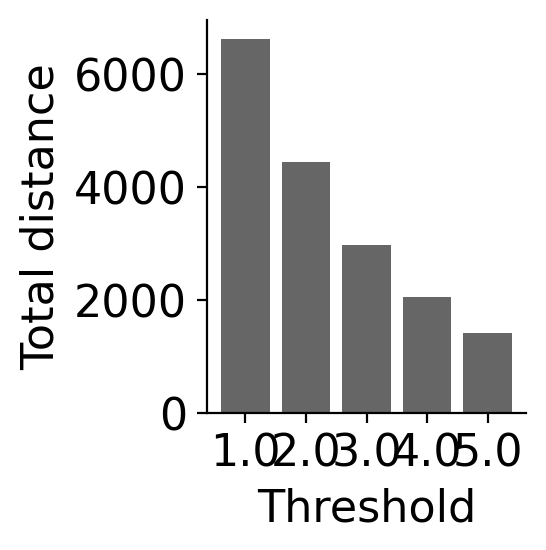

In [46]:
# your code cells here
# Score
scores = []
for result in results:
    l = 0.0
    for r in result:
        l += r["agent_total_l"][-1]
    scores.append(l)

# Tabulate
m, sd = [], []
for s in scores:
    m.append(np.mean(s))

# -
fig = plt.figure(figsize=(3, 3))
plt.bar([str(n) for n in names], m, color="black", alpha=0.6)
plt.ylabel("Total distance")
plt.xlabel("Threshold")
plt.tight_layout()
sns.despine()

### Plot the average number of deaths for each agent (i.e., threshold).

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

num_death:   0%|          | 0/100 [00:00<?, ?it/s]

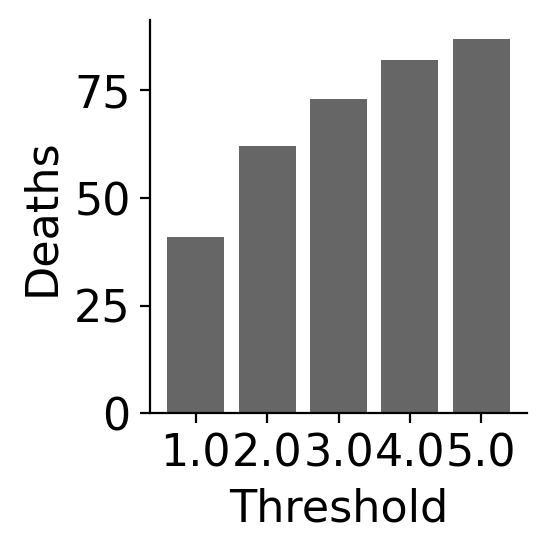

In [47]:
# Score
scores = []
for result in results:
    scores.append(num_death(result))

# -
fig = plt.figure(figsize=(3, 3))
plt.bar([str(n) for n in names], scores, color="black", alpha=0.6)
plt.ylabel("Deaths")
plt.xlabel("Threshold")
plt.tight_layout()
sns.despine()

### Plot the score of the best agent for each type of agent (i.e., threshold)

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

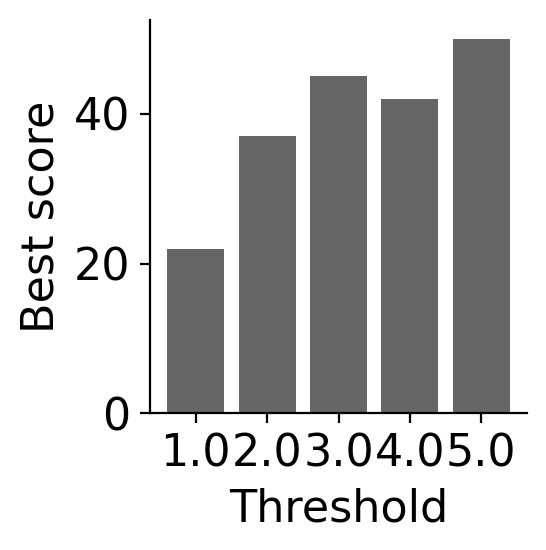

In [48]:
# Score
scores = []
for result in results:
    r = total_reward(result)
    scores.append(r)

# Tabulate
m = []
for s in scores:
    m.append(np.max(s))

# -
fig = plt.figure(figsize=(3, 3))
plt.bar([str(n) for n in names], m, color="black", alpha=0.6)
plt.ylabel("Best score")
plt.xlabel("Threshold")
plt.tight_layout()
sns.despine()

### Finally plot the average score for each type of agent (i.e., threshold).

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

total_reward:   0%|          | 0/100 [00:00<?, ?it/s]

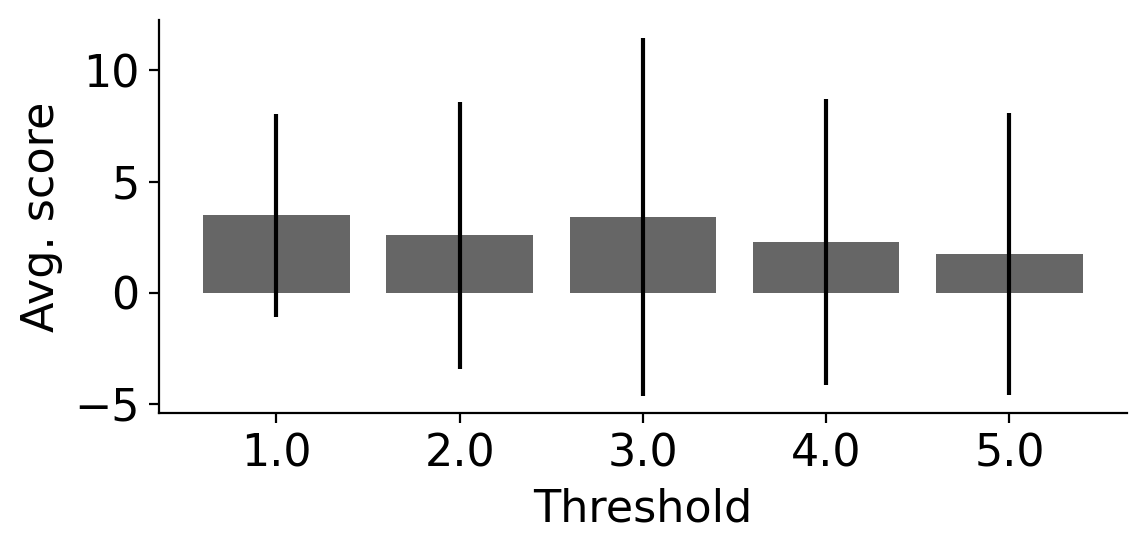

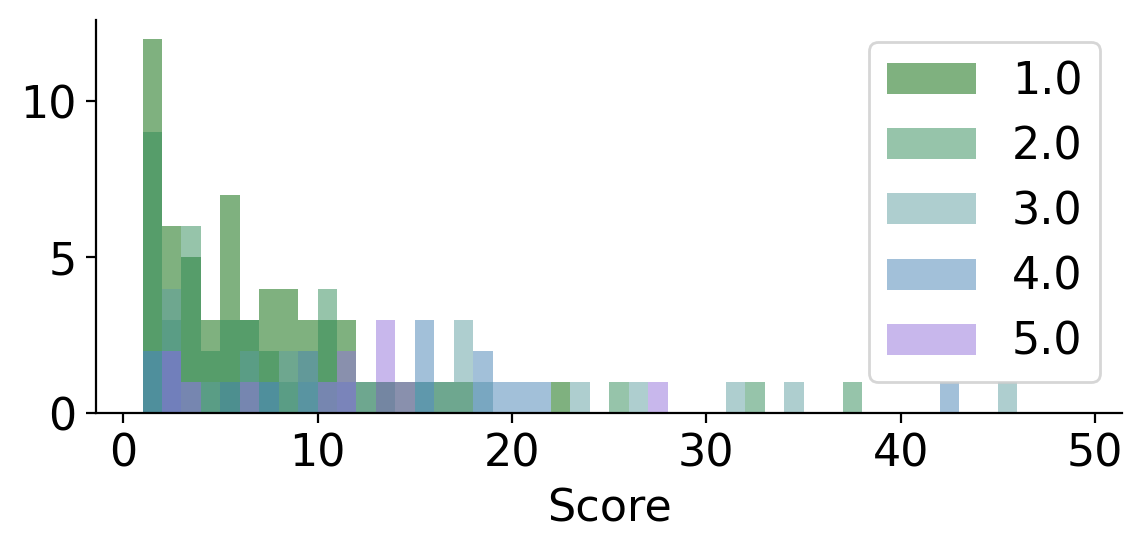

In [49]:
# Score
scores = []
for result in results:
    r = total_reward(result)
    scores.append(r)

# Tabulate
m, sd = [], []
for s in scores:
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(6, 3))
plt.bar([str(n) for n in names], m, yerr=sd, color="black", alpha=0.6)
plt.ylabel("Avg. score")
plt.xlabel("Threshold")
plt.tight_layout()
sns.despine()

# Dists of means
fig = plt.figure(figsize=(6, 3))
for (i, s, c) in zip(names, scores, colors):
    plt.hist(s, label=i, color=c, alpha=0.5, bins=list(range(1,50,1)))
    plt.legend()
    plt.xlabel("Score")
    plt.tight_layout()
    sns.despine()

### Question 3.1 [5 pt]

Based on the plots above and in your own words, summarize the relationship between the decision _threshold_ and the performance of the agnets.  How do the effects of increasing threshold compare to the effects of increasing drift rate (from the example in Lab 4)?

In [ ]:
# As decision threshold increases, the agent becomes more conservative and requires
# a greater scent to make a decision. As depicted in the data, this can result
# in more accurate hit rates. However there seems to come a point, after the third
# threshold, that the agent may be missing targets and therefore decreasing the
# average score.

# Along with this, as threshold increase, the distance traveled decreases.
# Still, the number of deaths tend to increase almost proportionally to the
# number of scores across thresholds, making all thresholds nearly equally as
# advantageous.

# Conversely, as decision threshold decreases, the agent becomes more libral and
# requires less scent to make a decision. However, this relationship seems to
# create a pyramid of sorts, as there is a peak in performance at the third threshold.

# Similarly to the effects of increasing threshold, increasing drift rate also
# tends to peak at some point (around 1.0 in Lab 4) as it generally allows an
# agent to accumulate evidence faster. While this can be beneficial for
# performance, just like an increase in threshold, it can also be detrimental at
# higher levels as it may result in decisions that are less accurate and more
# influenced by noise than those with lower drift rates.

### Question 3.2 [5 pt]

Based on your observations, do you think an accumulator is needed for this *particular* task setup?  Would you expect an agent which doesn't accumulate (having a threshold of almost zero, thus reacting immediately to its first sensory signal) to outform an agent which uses multiple time steps to accumulate evidence?

In [ ]:
# Considering the tradeoff we see between total distance traveled, number of
# deaths, and best score, I would expect a similar peak where a threshold of
# about 3 would outperform an agent which doesn't accumulate. There would
# be a large difference in distance traveled, as an agent which doesn't accumulate
# would travel a much greater distance. However, the same agents would likely
# have the lowest number of deaths. Still, their best scores would likely be the
# lowest out of the thresholds.

# However, if we were to only look at the final plots that represent the average
# scores across thresholds, there would likely be a similar representation
# between all of the thresholds, based on this particular task setup.


### Question 3.3 [5 pt]

Let's get philosophical. In what scenarios would pure random exploration (e.g., the diffusion and levy agents) be better than agents that utilize the energy necessary to process and accumulate sensory signals (e.g., the sniff agents)?


In [ ]:
# Random exploration would likely be advantageous in environments with large
# amounts of noise or in other words, completely unfamiliar environments. This
# is because an agent like a sniff agent, may produce greater false alarms if
# they are not tuned to make correct rejections or hits regarding the differentiation
# between noise and targets. Along a similar veign, in environments that are
# changing frequently, random agents may out-perform agents that utilize the energy
# necessary to process and accumulate sensory signals.

# Additionally, since it requires time and as seen in the plots above, sniff
# agents often explore smaller distances than random agents, it would likely
# be advantageous for random agents where split-second decisions are crucial to
# survive. In other words, when agents do not have time to process and accumulate
# the sensory signals around them, it would be better to explore at pure random.
# In addition, in environments that lack sensory signals or lack a lot of signals,
# pure random exploration would be better than sniff agents since they would not
# get "stuck" in a sense looking for information to process and accumulate. Instead,
# these random agents would simply explore a vaster area and likely end up finding
# some target quicker than an agent which systematically searches and requires
# sensory signals.


**IMPORTANT** Did you collaborate with anyone on this assignment, or use LLMs like ChatGPT? If so, list their names here.
> N/A

**DUE:** 5pm ET, Oct. 3, 2023. Email the link to the completed notebook on your Github repository to the TA and me via Canvas.